In [1]:
#Import required libraries
import json
import pandas as pd
from pandas.io.json import json_normalize
import os
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectFromModel

In [2]:
#Set the path to file directory 
os.chdir(r'E:\customerdata')

In [3]:
data = []
with open('customersdata.json') as f:
    for line in f:
        data.append(json.loads(line))

In [4]:
#data

In [5]:
#We got to know that data is in the form of nested columns we need to normalize the data and store in data frame
dataframe = pd.DataFrame.from_dict(json_normalize(data))
dataframe.head()

,customer.customerBillingAddress,customer.customerDevice,customer.customerEmail,customer.customerIPAddress,customer.customerPhone,fraudulent,orders,paymentMethods,transactions
0,"5493 Jones Islands\nBrownside, CA 51896",yyeiaxpltf82440jnb3v,josephhoward@yahoo.com,8.129.104.40,400-108-5415,False,"[{'orderId': 'vjbdvd', 'orderAmount': 18, 'ord...","[{'paymentMethodId': 'wt07xm68b', 'paymentMeth...","[{'transactionId': 'a9lcj51r', 'orderId': 'vjb..."
1,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546,True,"[{'orderId': 'nlghpa', 'orderAmount': 45, 'ord...","[{'paymentMethodId': 'y3xp697jx', 'paymentMeth...","[{'transactionId': '5mi94sfw', 'orderId': 'nlg..."
2,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",4m7h5ipl1shyavt6vv2r,andersonwilliam@yahoo.com,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,024.420.0375,False,"[{'orderId': 'yk34y2', 'orderAmount': 33, 'ord...","[{'paymentMethodId': '8pneoi03z', 'paymentMeth...","[{'transactionId': 'q3lyvbza', 'orderId': 'yk3..."
3,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",slovx60t0i558may4ks0,rubenjuarez@yahoo.com,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,670.664.8168x94985,False,"[{'orderId': 'fbz9ep', 'orderAmount': 34, 'ord...","[{'paymentMethodId': 'pdxjdwui4', 'paymentMeth...","[{'transactionId': 'vx4cjc27', 'orderId': 'fbz..."
4,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",j0pd24k5h8dl2fqu0cz4,uchen@malone.com,196.89.235.192,1-981-877-0870,True,"[{'orderId': '56h7iw', 'orderAmount': 71, 'ord...","[{'paymentMethodId': 'w1i1zq3rg', 'paymentMeth...","[{'transactionId': 'q8j3dgni', 'orderId': '56h..."


The only problem now is that we have column values that are nested…and not entirely usable at this point. Let’s explore them and unpack the values.

Use json_normalize method for flattening our data.

Here lets assume fraudulent as a key and extract all the data variables, by this understanding the data will be much easier.

In [6]:
#Orders data
ORDERS=json_normalize(data,'orders',['fraudulent'],errors='ignore')
print(ORDERS.shape)
ORDERS.head(3)

(478, 5)


,orderAmount,orderId,orderShippingAddress,orderState,fraudulent
0,18,vjbdvd,"5493 Jones Islands\nBrownside, CA 51896",pending,False
1,26,yp6x27,"5493 Jones Islands\nBrownside, CA 51896",fulfilled,False
2,45,nlghpa,"898 Henry Ports\nNew Keithview, CA 95893-2497",fulfilled,True


In [7]:
#ORDERS.info()

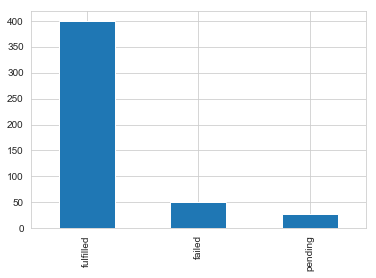

In [8]:
#some exploratory analysis of ORDERS data variable
ORDERS['orderState'].value_counts().plot.bar()#count

most of the orders are fulfilled ie. without any problem orders are shipping to the addresses. 
we can see very less count of the orders are failed this may due to the transaction or payment failure.

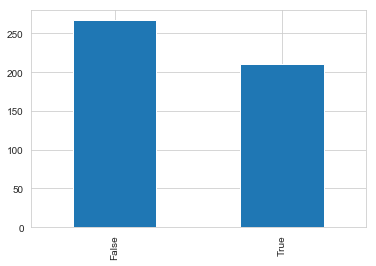

In [9]:
ORDERS['fraudulent'].value_counts().plot.bar()#count

the fraudulent can be happen more in orders. even though there is a high chance of false-fraudulent, we can observe that true count is nearby to the false count.

In [10]:
#paymentMethods data
PAYMENTSMETHODS=json_normalize(data,'paymentMethods',['fraudulent'])
print(PAYMENTSMETHODS.shape)
PAYMENTSMETHODS.head(3)

(342, 6)


,paymentMethodId,paymentMethodIssuer,paymentMethodProvider,paymentMethodRegistrationFailure,paymentMethodType,fraudulent
0,wt07xm68b,Citizens First Banks,JCB 16 digit,True,card,False
1,y3xp697jx,Solace Banks,VISA 16 digit,True,bitcoin,True
2,6krszxc05,Vertex Bancorp,VISA 16 digit,False,card,True


In [11]:
#PAYMENTSMETHODS.info()

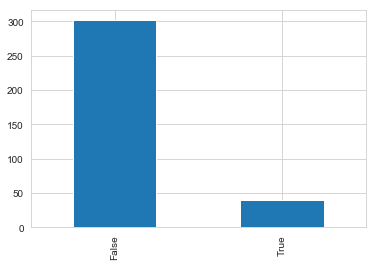

In [12]:
#some exploratory analysis of PAYMENTSMETHODS data variable
PAYMENTSMETHODS['paymentMethodRegistrationFailure'].value_counts().plot.bar()#count

for payment method registration there is a less chance of failure.

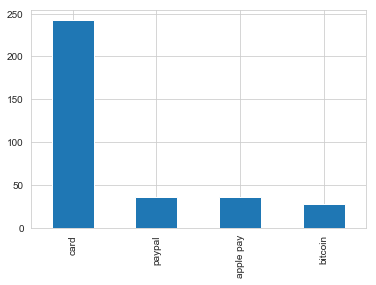

In [13]:
PAYMENTSMETHODS['paymentMethodType'].value_counts().plot.bar()#count

we can see that most of the customers are using card for payment.

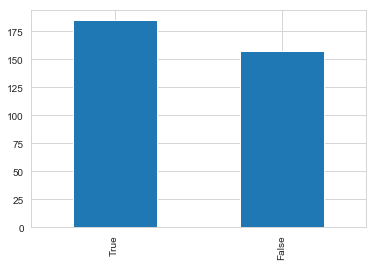

In [14]:
PAYMENTSMETHODS['fraudulent'].value_counts().plot.bar()#count

there are more fraudulents in payment_methods. 

In [15]:
#transactions data
TRANSACTIONS=json_normalize(data,'transactions',['fraudulent','customer'])
print(TRANSACTIONS.shape)
TRANSACTIONS.head(3)

(623, 7)


,orderId,paymentMethodId,transactionAmount,transactionFailed,transactionId,fraudulent,customer
0,vjbdvd,wt07xm68b,18,False,a9lcj51r,False,"{'customerEmail': 'josephhoward@yahoo.com', 'c..."
1,yp6x27,wt07xm68b,26,False,y4wcv03i,False,"{'customerEmail': 'josephhoward@yahoo.com', 'c..."
2,nlghpa,41ug157xz,45,False,5mi94sfw,True,"{'customerEmail': 'evansjeffery@yahoo.com', 'c..."


In [16]:
#TRANSACTIONS.info()

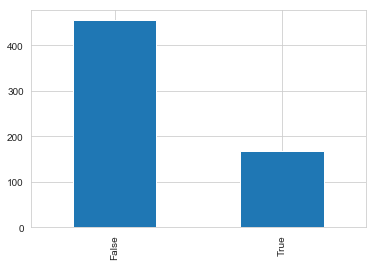

In [17]:
#some exploratory analysis of PAYMENTSMETHODS data variable
TRANSACTIONS['transactionFailed'].value_counts().plot.bar()#count

transaction failure happening is less chance. it may due to some payment or order issue. there is high rate of transaction. 

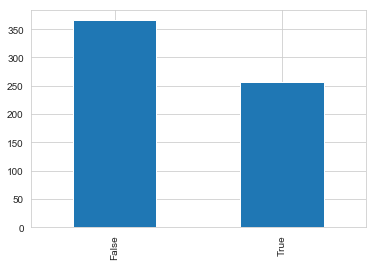

In [18]:
TRANSACTIONS['fraudulent'].value_counts().plot.bar()#count

 there is a high chance of false-fraudulent, we can observe that true count is also more.

from the TRANSACTIONS we can see customer variable, normalize it for further understanding 

In [19]:
#customer data
CUSTOMER=json_normalize(TRANSACTIONS['customer'])
print(CUSTOMER.shape)
CUSTOMER.head(3)

(623, 5)


,customerBillingAddress,customerDevice,customerEmail,customerIPAddress,customerPhone
0,"5493 Jones Islands\nBrownside, CA 51896",yyeiaxpltf82440jnb3v,josephhoward@yahoo.com,8.129.104.40,400-108-5415
1,"5493 Jones Islands\nBrownside, CA 51896",yyeiaxpltf82440jnb3v,josephhoward@yahoo.com,8.129.104.40,400-108-5415
2,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546


As we extracted all the data from variables now merge them and make one final data frame

In [20]:
#Merging PAYMENTSMETHODS and TRANSACTIONS 
P_T=pd.merge(PAYMENTSMETHODS,TRANSACTIONS,on='paymentMethodId')

In [21]:
#Merging ORDERS and P_T
P_T_O=pd.merge(P_T,ORDERS,on='orderId')
print(P_T_O.shape)
P_T_O.head(3)

(623, 16)


,paymentMethodId,paymentMethodIssuer,paymentMethodProvider,paymentMethodRegistrationFailure,paymentMethodType,fraudulent_x,orderId,transactionAmount,transactionFailed,transactionId,fraudulent_y,customer,orderAmount,orderShippingAddress,orderState,fraudulent
0,wt07xm68b,Citizens First Banks,JCB 16 digit,True,card,False,vjbdvd,18,False,a9lcj51r,False,"{'customerEmail': 'josephhoward@yahoo.com', 'c...",18,"5493 Jones Islands\nBrownside, CA 51896",pending,False
1,wt07xm68b,Citizens First Banks,JCB 16 digit,True,card,False,yp6x27,26,False,y4wcv03i,False,"{'customerEmail': 'josephhoward@yahoo.com', 'c...",26,"5493 Jones Islands\nBrownside, CA 51896",fulfilled,False
2,y3xp697jx,Solace Banks,VISA 16 digit,True,bitcoin,True,bn44oh,43,True,a33145ss,True,"{'customerEmail': 'evansjeffery@yahoo.com', 'c...",43,"5093 Bryan Forks\nJoshuaton, FM 01565-9801",fulfilled,True


In [22]:
Customer_data=pd.concat([CUSTOMER,P_T_O],axis=1)#Concatinating two data frames
print(Customer_data.shape)
Customer_data.head(3)

(623, 21)


,customerBillingAddress,customerDevice,customerEmail,customerIPAddress,customerPhone,paymentMethodId,paymentMethodIssuer,paymentMethodProvider,paymentMethodRegistrationFailure,paymentMethodType,...,orderId,transactionAmount,transactionFailed,transactionId,fraudulent_y,customer,orderAmount,orderShippingAddress,orderState,fraudulent
0,"5493 Jones Islands\nBrownside, CA 51896",yyeiaxpltf82440jnb3v,josephhoward@yahoo.com,8.129.104.40,400-108-5415,wt07xm68b,Citizens First Banks,JCB 16 digit,True,card,...,vjbdvd,18,False,a9lcj51r,False,"{'customerEmail': 'josephhoward@yahoo.com', 'c...",18,"5493 Jones Islands\nBrownside, CA 51896",pending,False
1,"5493 Jones Islands\nBrownside, CA 51896",yyeiaxpltf82440jnb3v,josephhoward@yahoo.com,8.129.104.40,400-108-5415,wt07xm68b,Citizens First Banks,JCB 16 digit,True,card,...,yp6x27,26,False,y4wcv03i,False,"{'customerEmail': 'josephhoward@yahoo.com', 'c...",26,"5493 Jones Islands\nBrownside, CA 51896",fulfilled,False
2,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546,y3xp697jx,Solace Banks,VISA 16 digit,True,bitcoin,...,bn44oh,43,True,a33145ss,True,"{'customerEmail': 'evansjeffery@yahoo.com', 'c...",43,"5093 Bryan Forks\nJoshuaton, FM 01565-9801",fulfilled,True


In [23]:
Customer_data=Customer_data.drop(['fraudulent_x','fraudulent_y','customer'],axis=1)#This will be our Final data

In [24]:
Customer_data.info()#information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 18 columns):
customerBillingAddress              623 non-null object
customerDevice                      623 non-null object
customerEmail                       623 non-null object
customerIPAddress                   623 non-null object
customerPhone                       623 non-null object
paymentMethodId                     623 non-null object
paymentMethodIssuer                 623 non-null object
paymentMethodProvider               623 non-null object
paymentMethodRegistrationFailure    623 non-null bool
paymentMethodType                   623 non-null object
orderId                             623 non-null object
transactionAmount                   623 non-null int64
transactionFailed                   623 non-null bool
transactionId                       623 non-null object
orderAmount                         623 non-null int64
orderShippingAddress                623 non-null object
order

In [25]:
#Customer_data.to_csv('Customer_data.csv',index=False)#Saving data to csv file.

# Pre-processing and EDA

In [26]:
Customer_data.isnull().sum()#sum of missing values in each column

customerBillingAddress              0
customerDevice                      0
customerEmail                       0
customerIPAddress                   0
customerPhone                       0
paymentMethodId                     0
paymentMethodIssuer                 0
paymentMethodProvider               0
paymentMethodRegistrationFailure    0
paymentMethodType                   0
orderId                             0
transactionAmount                   0
transactionFailed                   0
transactionId                       0
orderAmount                         0
orderShippingAddress                0
orderState                          0
fraudulent                          0
dtype: int64

we can see customerBillingAddress has some values which can be useful for us in data exploration. so extract data by splitting.

In [27]:
#Extract Address 
Customer_data['Customer_Area']=Customer_data['customerBillingAddress'].str.split("\n",expand=True)[1].str.split(",", expand=True)[0]
Customer_data['Customer_state']=Customer_data['customerBillingAddress'].str.split(",",expand=True)[1].str[:2]
Customer_data['Customer_city']=Customer_data['customerBillingAddress'].str.split(",",expand=True)[1].str[:3]
Customer_data['Customer_street']=Customer_data['customerBillingAddress'].str.split("\n",expand=True)[0]
Customer_data['Customer_pincode']=Customer_data['customerBillingAddress'].str.split(",",expand=True)[1].str[3:]

In [28]:
Customer_data=Customer_data.drop(['customerBillingAddress'],axis=1)

In [29]:
print(Customer_data.shape)
Customer_data.head(3)

(623, 22)


,customerDevice,customerEmail,customerIPAddress,customerPhone,paymentMethodId,paymentMethodIssuer,paymentMethodProvider,paymentMethodRegistrationFailure,paymentMethodType,orderId,...,transactionId,orderAmount,orderShippingAddress,orderState,fraudulent,Customer_Area,Customer_state,Customer_city,Customer_street,Customer_pincode
0,yyeiaxpltf82440jnb3v,josephhoward@yahoo.com,8.129.104.40,400-108-5415,wt07xm68b,Citizens First Banks,JCB 16 digit,True,card,vjbdvd,...,a9lcj51r,18,"5493 Jones Islands\nBrownside, CA 51896",pending,False,Brownside,C,CA,5493 Jones Islands,51896
1,yyeiaxpltf82440jnb3v,josephhoward@yahoo.com,8.129.104.40,400-108-5415,wt07xm68b,Citizens First Banks,JCB 16 digit,True,card,yp6x27,...,y4wcv03i,26,"5493 Jones Islands\nBrownside, CA 51896",fulfilled,False,Brownside,C,CA,5493 Jones Islands,51896
2,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546,y3xp697jx,Solace Banks,VISA 16 digit,True,bitcoin,bn44oh,...,a33145ss,43,"5093 Bryan Forks\nJoshuaton, FM 01565-9801",fulfilled,True,Port Joshuabury,N,NM,356 Elizabeth Inlet Suite 120,37681


For further details of customers we can also extract name and mail websites from customerEmail.

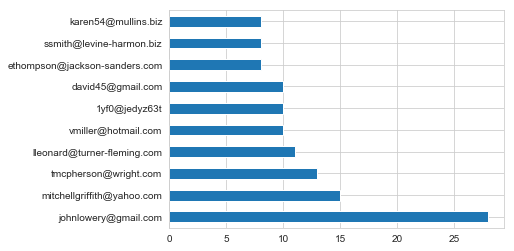

In [30]:
Customer_data['customerEmail'].value_counts()[:10].plot(kind='barh')

From the customers email_ids we can see that user_johnlowery@gmail.com is most ordered user.

In [31]:
#Lets extract Customer name from Email
Customer_data['customer_name']=Customer_data['customerEmail'].str.split('@',expand=True)[0]
Customer_data['customer_mailing_websites']=Customer_data['customerEmail'].str.split('@',expand=True)[1]

In [32]:
#Customer_data['customer_mailing_websites'].value_counts()#to check counts of email websites

In [33]:
#We can see that majority mail websites are gmail,yahoo and hotmail. these are well known to all people.
#Customize all mails as known and unknown.
Customer_data.loc[(Customer_data['customer_mailing_websites']=='gmail.com') | (Customer_data['customer_mailing_websites']=='yahoo.com') | (Customer_data['customer_mailing_websites']=='hotmail.com'),'customer_mailing_sites']= 'Known'
Customer_data.loc[(Customer_data['customer_mailing_websites']!='gmail.com') & (Customer_data['customer_mailing_websites']!='yahoo.com') & (Customer_data['customer_mailing_websites']!='hotmail.com'),'customer_mailing_sites']= 'UnKnown'

In [34]:
#Customer_data.head()

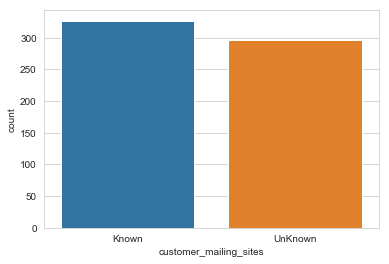

In [35]:
#countplot 
sns.countplot(x='customer_mailing_sites',data=Customer_data)

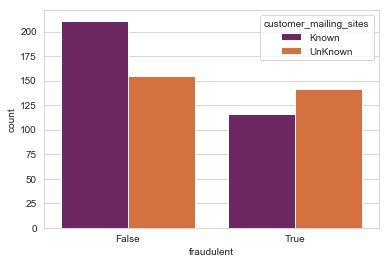

In [36]:
sns.countplot(x='fraudulent',hue='customer_mailing_sites',data=Customer_data,palette='inferno')

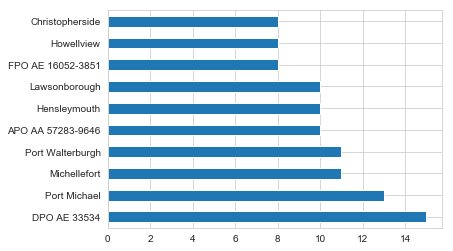

In [37]:
Customer_data['Customer_Area'].value_counts()[:10].plot(kind='barh')

Top 10 Customers_Areas.

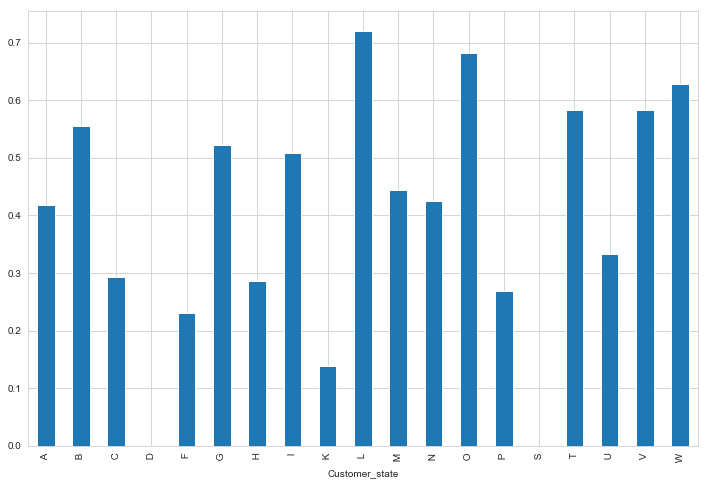

In [38]:
#lets check statewise and fraudulents
plt.figure(figsize=(12,8))
Customer_data.groupby('Customer_state')['fraudulent'].mean().plot.bar()

we can see that states-D,S are with no fraudulents, where the major fraudulents (above 60%) happening in states-L,O,W. 

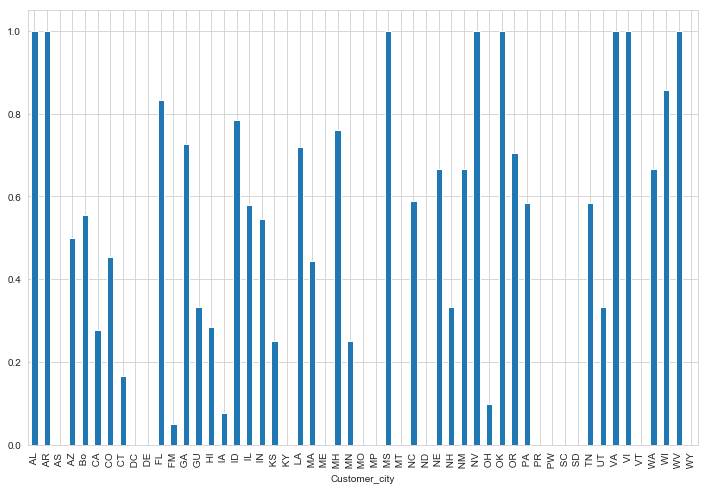

In [39]:
#lets check citywise and fraudulents
plt.figure(figsize=(12,8))
Customer_data.groupby('Customer_city')['fraudulent'].mean().plot(kind='bar', stacked=True)

we can see cities-AS,DC,DE,KY,ME,MO,MP,MT,ND,PR,PW,SC,SD,VT,WY are of no fraudulents and
cities-AL,AR,MS,NV,OK,VA,VI,WV are fraudulents.

In [40]:
#Do mapping to data variables which are necessary.
cmap={False:0,True:1}

In [41]:
Customer_data['fraudulent']=Customer_data['fraudulent'].map(cmap)
Customer_data['transactionFailed']=Customer_data['transactionFailed'].map(cmap)
Customer_data['paymentMethodRegistrationFailure']=Customer_data['paymentMethodRegistrationFailure'].map(cmap)

In [42]:
#Customer_data.head(3)

In [43]:
#Checking counts of paymentMethodIssuer
Customer_data.paymentMethodIssuer.value_counts()

Her Majesty Trust           66
His Majesty Bank Corp.      65
Vertex Bancorp              63
Fountain Financial Inc.     60
Bulwark Trust Corp.         59
Rose Bancshares             59
Bastion Banks               58
Citizens First Banks        55
Grand Credit Corporation    55
Solace Banks                41
B                           10
c                            7
e                            7
r                            6
a                            4
x                            4
o                            2
n                            1
p                            1
Name: paymentMethodIssuer, dtype: int64

In [44]:
#There are some banks with no name so lets assume no name banks are unknown banks.
Customer_data.loc[Customer_data['paymentMethodIssuer']=='B','paymentMethodIssuer']='Unknown Bank'
Customer_data.loc[Customer_data['paymentMethodIssuer']=='c','paymentMethodIssuer']='Unknown Bank'
Customer_data.loc[Customer_data['paymentMethodIssuer']=='e','paymentMethodIssuer']='Unknown Bank'
Customer_data.loc[Customer_data['paymentMethodIssuer']=='r','paymentMethodIssuer']='Unknown Bank'
Customer_data.loc[Customer_data['paymentMethodIssuer']=='x','paymentMethodIssuer']='Unknown Bank'
Customer_data.loc[Customer_data['paymentMethodIssuer']=='a','paymentMethodIssuer']='Unknown Bank'
Customer_data.loc[Customer_data['paymentMethodIssuer']=='o','paymentMethodIssuer']='Unknown Bank'
Customer_data.loc[Customer_data['paymentMethodIssuer']=='p','paymentMethodIssuer']='Unknown Bank'
Customer_data.loc[Customer_data['paymentMethodIssuer']=='n','paymentMethodIssuer']='Unknown Bank'

In [45]:
#Customer_data['paymentMethodIssuer'].value_counts()#counts of paymentMethodIssuer

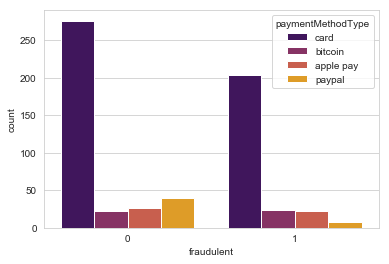

In [46]:
#countplot
sns.countplot(x='fraudulent',hue='paymentMethodType',data=Customer_data,palette='inferno')

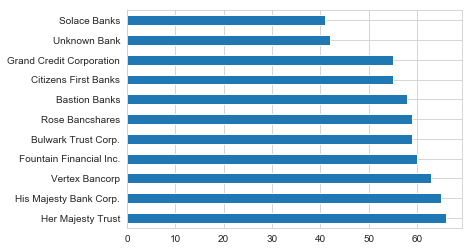

In [47]:
#count of paymentMethodIssuer
Customer_data['paymentMethodIssuer'].value_counts().plot(kind='barh')

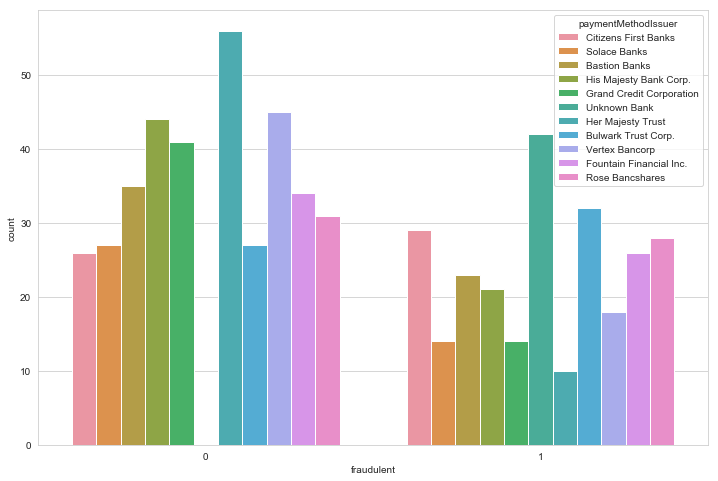

In [48]:
#countplot visualizations
plt.figure(figsize=(12,8))
sns.countplot(x='fraudulent',hue='paymentMethodIssuer',data=Customer_data)

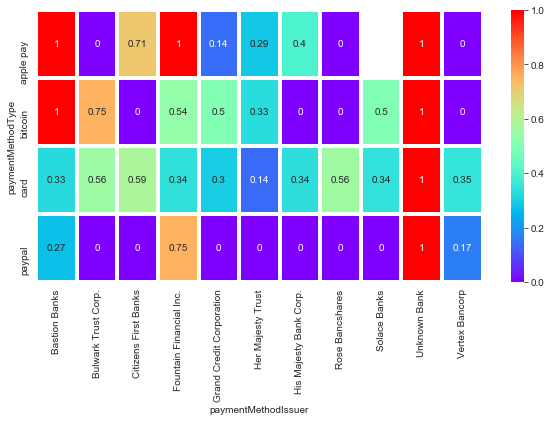

In [49]:
#pivot_table() is used for summarizing data
cc=Customer_data.pivot_table(index='paymentMethodType',columns='paymentMethodIssuer',values='fraudulent')
plt.figure(figsize=(10,5))
sns.heatmap(cc,cmap='rainbow',linecolor='White',linewidths=3,annot=True)

here 1 represents 100% fraudulents and 0 is no fraudulents.
so from paypal there is very less of fraudulents happening, from card there is some chance of fraudulents and from apple pay there is a high chance of fraudulents happening.

we can see that there is more fraudulents happening in unknown banks and very less fraudulents in Rose Bancshares.

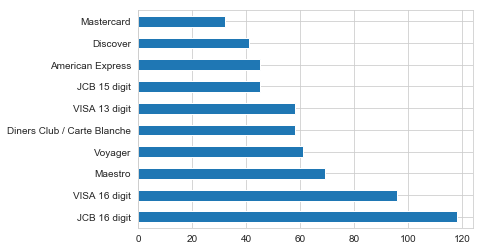

In [50]:
#count of paymentMethodProvider
Customer_data['paymentMethodProvider'].value_counts().plot(kind='barh')

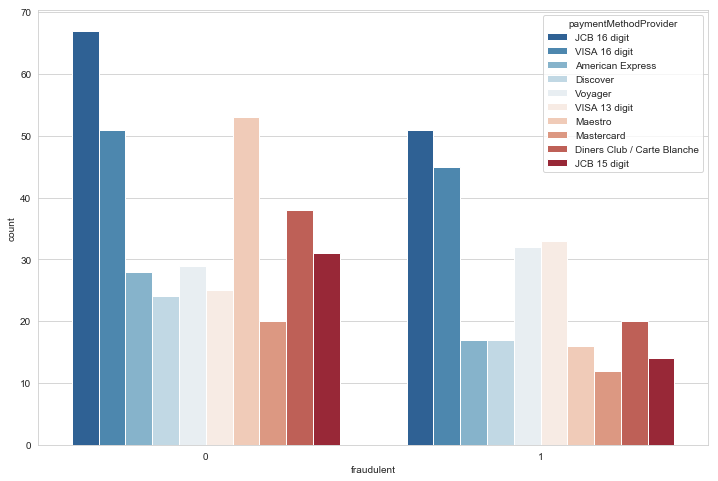

In [51]:
#countplot visualizations
plt.figure(figsize=(12,8))
sns.countplot(x='fraudulent',hue='paymentMethodProvider',data=Customer_data,palette='RdBu_r')

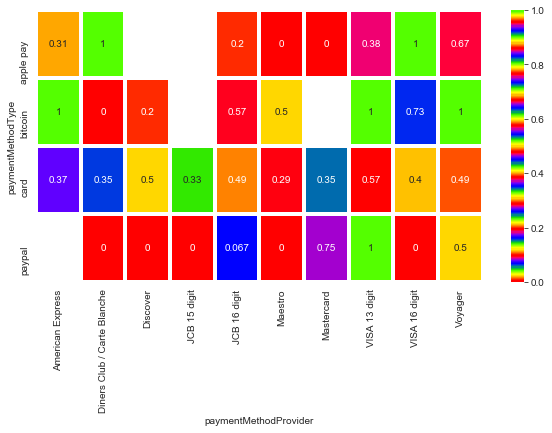

In [52]:
sn=Customer_data.pivot_table(index='paymentMethodType',columns='paymentMethodProvider',values='fraudulent')
plt.figure(figsize=(10,5))
sns.heatmap(sn,cmap='prism',linecolor='White',linewidths=3,annot=True)

from paypal there is very less of fraudulents happening and from VISA 13 digit there is a high fraudulents happening.

In [53]:
#Extract data from orderShippingAddress
Customer_data['ordershipping_Area']=Customer_data['orderShippingAddress'].str.split("\n",expand=True)[1].str.split(",", expand=True)[0]
Customer_data['ordershipping_City']=Customer_data['orderShippingAddress'].str.split(",",expand=True)[1].str[:3]
Customer_data['ordershipping_state']=Customer_data['orderShippingAddress'].str.split(",",expand=True)[1].str[:2]
Customer_data['ordershipping_street']=Customer_data['orderShippingAddress'].str.split("\n",expand=True)[0]
Customer_data['ordershipping_pincode']=Customer_data['orderShippingAddress'].str.split(",",expand=True)[1].str[3:]

In [54]:
df_data=Customer_data.drop(['orderShippingAddress'],axis=1)
print(df_data.shape)
df_data.head(3)

(623, 29)


,customerDevice,customerEmail,customerIPAddress,customerPhone,paymentMethodId,paymentMethodIssuer,paymentMethodProvider,paymentMethodRegistrationFailure,paymentMethodType,orderId,...,Customer_street,Customer_pincode,customer_name,customer_mailing_websites,customer_mailing_sites,ordershipping_Area,ordershipping_City,ordershipping_state,ordershipping_street,ordershipping_pincode
0,yyeiaxpltf82440jnb3v,josephhoward@yahoo.com,8.129.104.40,400-108-5415,wt07xm68b,Citizens First Banks,JCB 16 digit,1,card,vjbdvd,...,5493 Jones Islands,51896,josephhoward,yahoo.com,Known,Brownside,CA,C,5493 Jones Islands,51896
1,yyeiaxpltf82440jnb3v,josephhoward@yahoo.com,8.129.104.40,400-108-5415,wt07xm68b,Citizens First Banks,JCB 16 digit,1,card,yp6x27,...,5493 Jones Islands,51896,josephhoward,yahoo.com,Known,Brownside,CA,C,5493 Jones Islands,51896
2,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546,y3xp697jx,Solace Banks,VISA 16 digit,1,bitcoin,bn44oh,...,356 Elizabeth Inlet Suite 120,37681,evansjeffery,yahoo.com,Known,Joshuaton,FM,F,5093 Bryan Forks,01565-9801


In [55]:
#From the orderShippingAddress variable we got many insights which we can perform.
#we can get visualizations same like customers. here some data visualizations which you can find.

#plt.figure(figsize=(12,8))
#df_data.groupby('ordershipping_City')['fraudulent'].mean().plot(kind='bar', stacked=True)#checking citywise and fraudulents 

#df_data['ordershipping_Area'].value_counts()[:10].plot(kind='barh')#counts

#plt.figure(figsize=(12,8))
#df_data.groupby('ordershipping_state')['fraudulent'].mean().plot.bar()#checking statewise and fraudulents

In [56]:
#orderState counts
df_data['orderState'].value_counts()

fulfilled    516
failed        63
pending       44
Name: orderState, dtype: int64

In [57]:
#Do mapping 
df_data.loc[df_data['orderState']=='fulfilled','orderState']='1'
df_data.loc[df_data['orderState']=='failed','orderState']='0'
df_data.loc[df_data['orderState']=='pending','orderState']='2'

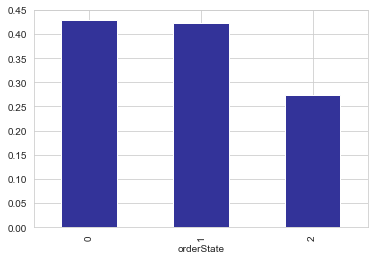

In [58]:
df_data.groupby('orderState')['fraudulent'].mean().plot(kind='bar', stacked=True, colormap='terrain')


In [59]:
dd=df_data.pivot_table(index='Customer_state',columns='paymentMethodIssuer',values='fraudulent')
dd.head()

paymentMethodIssuer,Bastion Banks,Bulwark Trust Corp.,Citizens First Banks,Fountain Financial Inc.,Grand Credit Corporation,Her Majesty Trust,His Majesty Bank Corp.,Rose Bancshares,Solace Banks,Unknown Bank,Vertex Bancorp
Customer_state,,,,,,,,,,,
A,0.0,0.25,NaN,1.000000,0.125,0.0,0.363636,NaN,NaN,1.0,0.250000
B,NaN,NaN,1.0,NaN,0.000,NaN,NaN,0.0,0.000000,NaN,NaN
C,NaN,0.60,0.0,0.666667,0.000,0.0,1.000000,0.0,1.000000,NaN,0.428571
D,0.0,NaN,NaN,0.000000,NaN,0.0,NaN,NaN,NaN,NaN,0.000000
F,0.0,NaN,NaN,0.250000,0.000,NaN,NaN,NaN,0.666667,1.0,NaN


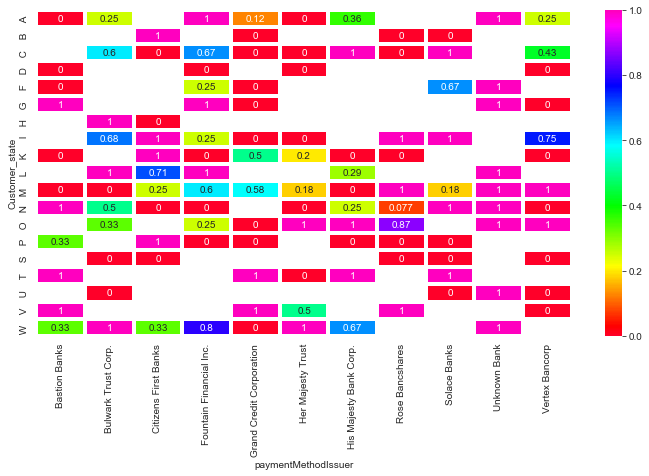

In [60]:
plt.figure(figsize=(12,6))
sns.heatmap(dd,cmap='gist_rainbow',linewidth=3,linecolor='white',annot=True)

there are some missing values included and also percentage rates of fraudulent.

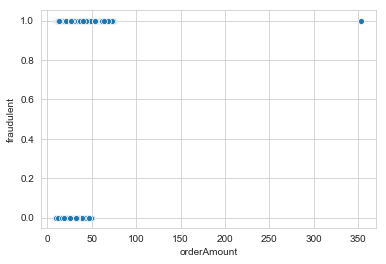

In [61]:
#scatterplot is used for ffinding outlieres
sns.scatterplot(x='orderAmount',y='fraudulent',data=df_data)

In [62]:
#Remove outliers with z-score
#another way to find outliers is using boxplot if data is huge
import numpy as np
outliers=[]
def detect_outlier(df_data):
    
    threshold=3
    mean = np.mean(df_data)
    std =np.std(df_data)
    
    
    for y in df_data:
        z_score= (y - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [63]:
outliers=detect_outlier(df_data['orderAmount'])
outliers

[353]

In [64]:
df_data.drop(353,inplace=True)#Dropping outlier
print(df_data.shape)
df_data.head(3)

(622, 29)


,customerDevice,customerEmail,customerIPAddress,customerPhone,paymentMethodId,paymentMethodIssuer,paymentMethodProvider,paymentMethodRegistrationFailure,paymentMethodType,orderId,...,Customer_street,Customer_pincode,customer_name,customer_mailing_websites,customer_mailing_sites,ordershipping_Area,ordershipping_City,ordershipping_state,ordershipping_street,ordershipping_pincode
0,yyeiaxpltf82440jnb3v,josephhoward@yahoo.com,8.129.104.40,400-108-5415,wt07xm68b,Citizens First Banks,JCB 16 digit,1,card,vjbdvd,...,5493 Jones Islands,51896,josephhoward,yahoo.com,Known,Brownside,CA,C,5493 Jones Islands,51896
1,yyeiaxpltf82440jnb3v,josephhoward@yahoo.com,8.129.104.40,400-108-5415,wt07xm68b,Citizens First Banks,JCB 16 digit,1,card,yp6x27,...,5493 Jones Islands,51896,josephhoward,yahoo.com,Known,Brownside,CA,C,5493 Jones Islands,51896
2,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546,y3xp697jx,Solace Banks,VISA 16 digit,1,bitcoin,bn44oh,...,356 Elizabeth Inlet Suite 120,37681,evansjeffery,yahoo.com,Known,Joshuaton,FM,F,5093 Bryan Forks,01565-9801


In [65]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 622 entries, 0 to 622
Data columns (total 29 columns):
customerDevice                      622 non-null object
customerEmail                       622 non-null object
customerIPAddress                   622 non-null object
customerPhone                       622 non-null object
paymentMethodId                     622 non-null object
paymentMethodIssuer                 622 non-null object
paymentMethodProvider               622 non-null object
paymentMethodRegistrationFailure    622 non-null int64
paymentMethodType                   622 non-null object
orderId                             622 non-null object
transactionAmount                   622 non-null int64
transactionFailed                   622 non-null int64
transactionId                       622 non-null object
orderAmount                         622 non-null int64
orderState                          622 non-null object
fraudulent                          622 non-null int64
Cust

In [66]:
#Remove unwanted columns
data=df_data.drop(['customerDevice','customerEmail','customerIPAddress','customerPhone','ordershipping_City','Customer_city',
               'ordershipping_Area','ordershipping_pincode','Customer_pincode','orderId','paymentMethodId','transactionId',
                'transactionAmount','Customer_street','ordershipping_street','Customer_Area','customer_mailing_websites'],axis=1)

In [67]:
print(data.shape)
data.head(3)

(622, 12)


,paymentMethodIssuer,paymentMethodProvider,paymentMethodRegistrationFailure,paymentMethodType,transactionFailed,orderAmount,orderState,fraudulent,Customer_state,customer_name,customer_mailing_sites,ordershipping_state
0,Citizens First Banks,JCB 16 digit,1,card,0,18,2,0,C,josephhoward,Known,C
1,Citizens First Banks,JCB 16 digit,1,card,0,26,1,0,C,josephhoward,Known,C
2,Solace Banks,VISA 16 digit,1,bitcoin,1,43,1,1,N,evansjeffery,Known,F


In [68]:
data.isnull().sum()#sum of missing values in each column

paymentMethodIssuer                  0
paymentMethodProvider                0
paymentMethodRegistrationFailure     0
paymentMethodType                    0
transactionFailed                    0
orderAmount                          0
orderState                           0
fraudulent                           0
Customer_state                      47
customer_name                        0
customer_mailing_sites               0
ordershipping_state                 36
dtype: int64

In [69]:
data.fillna(method='ffill',inplace=True)#fill na by forward fill

In [70]:
num_features=data.select_dtypes(include=[np.number])#Numerical variable
cat_features=data.select_dtypes(include=[np.object])#categorical variables

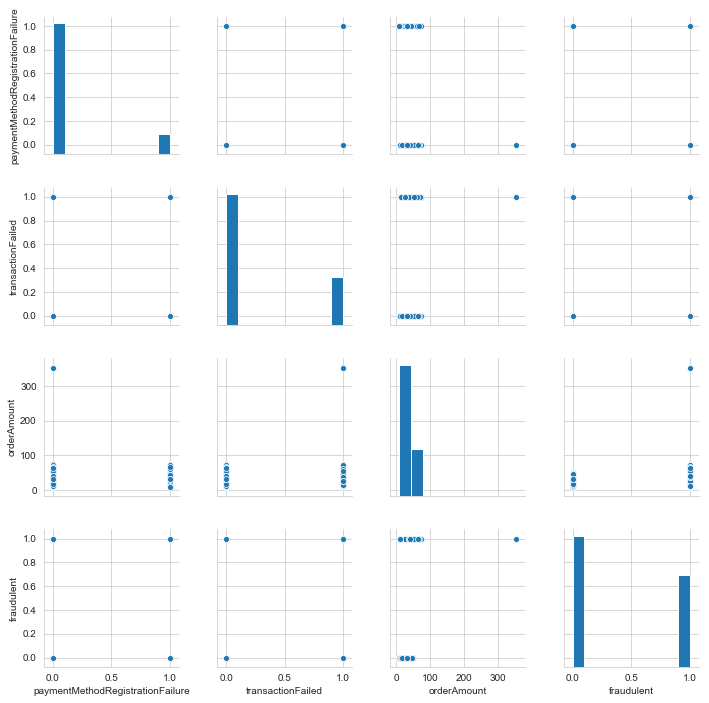

In [71]:
#pairplot of num_features
sns.pairplot(num_features)

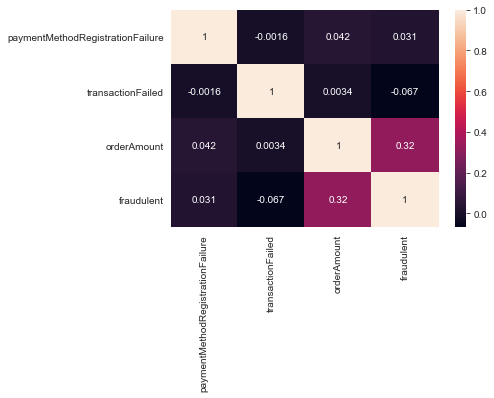

In [72]:
#Corelation plot of num_features
sns.heatmap(num_features.corr(),annot=True)

In [73]:
#Label encoding
le=LabelEncoder()
for i in cat_features:
    data[i]=le.fit_transform(data[i])

In [74]:
data.head()

,paymentMethodIssuer,paymentMethodProvider,paymentMethodRegistrationFailure,paymentMethodType,transactionFailed,orderAmount,orderState,fraudulent,Customer_state,customer_name,customer_mailing_sites,ordershipping_state
0,2,4,1,2,0,18,2,0,2,64,0,2
1,2,4,1,2,0,26,1,0,2,64,0,2
2,8,8,1,1,1,43,1,1,11,43,0,4
3,0,0,0,1,0,45,1,1,11,43,0,2
4,0,0,0,1,0,23,1,1,11,43,0,11


In [75]:
#Dummification
columns=['paymentMethodIssuer','paymentMethodProvider','paymentMethodType','orderState','Customer_state','ordershipping_state','customer_mailing_sites']
train_data=pd.get_dummies(data,columns=columns)

In [76]:
#train_data.dtypes

In [77]:
train_data.shape

(622, 74)

In [78]:
x=train_data.drop('fraudulent',axis=1)
y=train_data['fraudulent']
print(x.shape)
print(y.shape)

(622, 73)
(622,)


In [79]:
y.value_counts()

0    366
1    256
Name: fraudulent, dtype: int64

In [80]:
#Split the data for model selection
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Model Building

In [81]:
#Bulding a pipeline - Random forest model
classifier = RandomForestClassifier(n_estimators=100)
pipeline = Pipeline([
    ('clf', classifier),
])

In [82]:
parameter_grid = {
    'clf__max_features': [0.5, 1,2,3],
    'clf__max_depth': [1,2,3,4,5,None],
    'clf__max_leaf_nodes': [None,20,30,40,50,60],
    'clf__n_jobs': [1,2,None]
}

In [83]:
grid_search = GridSearchCV(pipeline, parameter_grid, cv=5, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV] clf__max_depth=1, clf__max_features=0.5, clf__max_leaf_nodes=None, clf__n_jobs=1 
[CV]  clf__max_depth=1, clf__max_features=0.5, clf__max_leaf_nodes=None, clf__n_jobs=1, score=0.75, total=   0.1s
[CV] clf__max_depth=1, clf__max_features=0.5, clf__max_leaf_nodes=None, clf__n_jobs=1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  clf__max_depth=1, clf__max_features=0.5, clf__max_leaf_nodes=None, clf__n_jobs=1, score=0.71, total=   0.0s
[CV] clf__max_depth=1, clf__max_features=0.5, clf__max_leaf_nodes=None, clf__n_jobs=1 
[CV]  clf__max_depth=1, clf__max_features=0.5, clf__max_leaf_nodes=None, clf__n_jobs=1, score=0.6565656565656566, total=   0.1s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] clf__max_depth=1, clf__max_features=0.5, clf__max_leaf_nodes=None, clf__n_jobs=1 
[CV]  clf__max_depth=1, clf__max_features=0.5, clf__max_leaf_nodes=None, clf__n_jobs=1, score=0.7878787878787878, total=   0.0s
[CV] clf__max_depth=1, clf__max_features=0.5, clf__max_leaf_nodes=None, clf__n_jobs=1 
[CV]  clf__max_depth=1, clf__max_features=0.5, clf__max_leaf_nodes=None, clf__n_jobs=1, score=0.7676767676767676, total=   0.1s
[CV] clf__max_depth=1, clf__max_features=0.5, clf__max_leaf_nodes=None, clf__n_jobs=2 
[CV]  clf__max_depth=1, clf__max_features=0.5, clf__max_leaf_nodes=None, clf__n_jobs=2, score=0.76, total=   3.8s
[CV] clf__max_depth=1, clf__max_features=0.5, clf__max_leaf_nodes=None, clf__n_jobs=2 
[CV]  clf__max_depth=1, clf__max_features=0.5, clf__max_leaf_nodes=None, clf__n_jobs=2, score=0.66, total=   0.2s
[CV] clf__max_depth=1, clf__max_features=0.5, clf__max_leaf_nodes=None, clf__n_jobs=2 
[CV]  clf__max_depth=1, clf__max_features=0.5, clf__max_leaf_nodes=None, clf__n_j

[CV]  clf__max_depth=1, clf__max_features=0.5, clf__max_leaf_nodes=30, clf__n_jobs=None, score=0.7474747474747475, total=   0.1s
[CV] clf__max_depth=1, clf__max_features=0.5, clf__max_leaf_nodes=30, clf__n_jobs=None 
[CV]  clf__max_depth=1, clf__max_features=0.5, clf__max_leaf_nodes=30, clf__n_jobs=None, score=0.797979797979798, total=   0.1s
[CV] clf__max_depth=1, clf__max_features=0.5, clf__max_leaf_nodes=30, clf__n_jobs=None 
[CV]  clf__max_depth=1, clf__max_features=0.5, clf__max_leaf_nodes=30, clf__n_jobs=None, score=0.7676767676767676, total=   0.0s
[CV] clf__max_depth=1, clf__max_features=0.5, clf__max_leaf_nodes=40, clf__n_jobs=1 
[CV]  clf__max_depth=1, clf__max_features=0.5, clf__max_leaf_nodes=40, clf__n_jobs=1, score=0.77, total=   0.1s
[CV] clf__max_depth=1, clf__max_features=0.5, clf__max_leaf_nodes=40, clf__n_jobs=1 
[CV]  clf__max_depth=1, clf__max_features=0.5, clf__max_leaf_nodes=40, clf__n_jobs=1, score=0.71, total=   0.1s
[CV] clf__max_depth=1, clf__max_features=0.5

[CV]  clf__max_depth=1, clf__max_features=0.5, clf__max_leaf_nodes=60, clf__n_jobs=2, score=0.7474747474747475, total=   0.2s
[CV] clf__max_depth=1, clf__max_features=0.5, clf__max_leaf_nodes=60, clf__n_jobs=2 
[CV]  clf__max_depth=1, clf__max_features=0.5, clf__max_leaf_nodes=60, clf__n_jobs=2, score=0.797979797979798, total=   0.2s
[CV] clf__max_depth=1, clf__max_features=0.5, clf__max_leaf_nodes=60, clf__n_jobs=2 
[CV]  clf__max_depth=1, clf__max_features=0.5, clf__max_leaf_nodes=60, clf__n_jobs=2, score=0.7676767676767676, total=   0.2s
[CV] clf__max_depth=1, clf__max_features=0.5, clf__max_leaf_nodes=60, clf__n_jobs=None 
[CV]  clf__max_depth=1, clf__max_features=0.5, clf__max_leaf_nodes=60, clf__n_jobs=None, score=0.77, total=   0.1s
[CV] clf__max_depth=1, clf__max_features=0.5, clf__max_leaf_nodes=60, clf__n_jobs=None 
[CV]  clf__max_depth=1, clf__max_features=0.5, clf__max_leaf_nodes=60, clf__n_jobs=None, score=0.71, total=   0.1s
[CV] clf__max_depth=1, clf__max_features=0.5, c

[CV]  clf__max_depth=1, clf__max_features=1, clf__max_leaf_nodes=30, clf__n_jobs=1, score=0.5858585858585859, total=   0.0s
[CV] clf__max_depth=1, clf__max_features=1, clf__max_leaf_nodes=30, clf__n_jobs=1 
[CV]  clf__max_depth=1, clf__max_features=1, clf__max_leaf_nodes=30, clf__n_jobs=1, score=0.5858585858585859, total=   0.1s
[CV] clf__max_depth=1, clf__max_features=1, clf__max_leaf_nodes=30, clf__n_jobs=1 
[CV]  clf__max_depth=1, clf__max_features=1, clf__max_leaf_nodes=30, clf__n_jobs=1, score=0.5858585858585859, total=   0.1s
[CV] clf__max_depth=1, clf__max_features=1, clf__max_leaf_nodes=30, clf__n_jobs=2 
[CV]  clf__max_depth=1, clf__max_features=1, clf__max_leaf_nodes=30, clf__n_jobs=2, score=0.59, total=   0.2s
[CV] clf__max_depth=1, clf__max_features=1, clf__max_leaf_nodes=30, clf__n_jobs=2 
[CV]  clf__max_depth=1, clf__max_features=1, clf__max_leaf_nodes=30, clf__n_jobs=2, score=0.59, total=   0.2s
[CV] clf__max_depth=1, clf__max_features=1, clf__max_leaf_nodes=30, clf__n_j

[CV] clf__max_depth=1, clf__max_features=1, clf__max_leaf_nodes=50, clf__n_jobs=None 
[CV]  clf__max_depth=1, clf__max_features=1, clf__max_leaf_nodes=50, clf__n_jobs=None, score=0.5858585858585859, total=   0.0s
[CV] clf__max_depth=1, clf__max_features=1, clf__max_leaf_nodes=50, clf__n_jobs=None 
[CV]  clf__max_depth=1, clf__max_features=1, clf__max_leaf_nodes=50, clf__n_jobs=None, score=0.5858585858585859, total=   0.1s
[CV] clf__max_depth=1, clf__max_features=1, clf__max_leaf_nodes=60, clf__n_jobs=1 
[CV]  clf__max_depth=1, clf__max_features=1, clf__max_leaf_nodes=60, clf__n_jobs=1, score=0.59, total=   0.1s
[CV] clf__max_depth=1, clf__max_features=1, clf__max_leaf_nodes=60, clf__n_jobs=1 
[CV]  clf__max_depth=1, clf__max_features=1, clf__max_leaf_nodes=60, clf__n_jobs=1, score=0.59, total=   0.0s
[CV] clf__max_depth=1, clf__max_features=1, clf__max_leaf_nodes=60, clf__n_jobs=1 
[CV]  clf__max_depth=1, clf__max_features=1, clf__max_leaf_nodes=60, clf__n_jobs=1, score=0.5858585858585

[CV]  clf__max_depth=1, clf__max_features=2, clf__max_leaf_nodes=20, clf__n_jobs=2, score=0.5858585858585859, total=   0.2s
[CV] clf__max_depth=1, clf__max_features=2, clf__max_leaf_nodes=20, clf__n_jobs=2 
[CV]  clf__max_depth=1, clf__max_features=2, clf__max_leaf_nodes=20, clf__n_jobs=2, score=0.5858585858585859, total=   0.2s
[CV] clf__max_depth=1, clf__max_features=2, clf__max_leaf_nodes=20, clf__n_jobs=None 
[CV]  clf__max_depth=1, clf__max_features=2, clf__max_leaf_nodes=20, clf__n_jobs=None, score=0.59, total=   0.0s
[CV] clf__max_depth=1, clf__max_features=2, clf__max_leaf_nodes=20, clf__n_jobs=None 
[CV]  clf__max_depth=1, clf__max_features=2, clf__max_leaf_nodes=20, clf__n_jobs=None, score=0.59, total=   0.0s
[CV] clf__max_depth=1, clf__max_features=2, clf__max_leaf_nodes=20, clf__n_jobs=None 
[CV]  clf__max_depth=1, clf__max_features=2, clf__max_leaf_nodes=20, clf__n_jobs=None, score=0.5858585858585859, total=   0.1s
[CV] clf__max_depth=1, clf__max_features=2, clf__max_leaf_

[CV]  clf__max_depth=1, clf__max_features=2, clf__max_leaf_nodes=50, clf__n_jobs=1, score=0.5858585858585859, total=   0.0s
[CV] clf__max_depth=1, clf__max_features=2, clf__max_leaf_nodes=50, clf__n_jobs=2 
[CV]  clf__max_depth=1, clf__max_features=2, clf__max_leaf_nodes=50, clf__n_jobs=2, score=0.59, total=   0.2s
[CV] clf__max_depth=1, clf__max_features=2, clf__max_leaf_nodes=50, clf__n_jobs=2 
[CV]  clf__max_depth=1, clf__max_features=2, clf__max_leaf_nodes=50, clf__n_jobs=2, score=0.59, total=   0.2s
[CV] clf__max_depth=1, clf__max_features=2, clf__max_leaf_nodes=50, clf__n_jobs=2 
[CV]  clf__max_depth=1, clf__max_features=2, clf__max_leaf_nodes=50, clf__n_jobs=2, score=0.5858585858585859, total=   0.2s
[CV] clf__max_depth=1, clf__max_features=2, clf__max_leaf_nodes=50, clf__n_jobs=2 
[CV]  clf__max_depth=1, clf__max_features=2, clf__max_leaf_nodes=50, clf__n_jobs=2, score=0.5858585858585859, total=   0.2s
[CV] clf__max_depth=1, clf__max_features=2, clf__max_leaf_nodes=50, clf__n_j

[CV]  clf__max_depth=1, clf__max_features=3, clf__max_leaf_nodes=None, clf__n_jobs=None, score=0.5858585858585859, total=   0.0s
[CV] clf__max_depth=1, clf__max_features=3, clf__max_leaf_nodes=20, clf__n_jobs=1 
[CV]  clf__max_depth=1, clf__max_features=3, clf__max_leaf_nodes=20, clf__n_jobs=1, score=0.62, total=   0.1s
[CV] clf__max_depth=1, clf__max_features=3, clf__max_leaf_nodes=20, clf__n_jobs=1 
[CV]  clf__max_depth=1, clf__max_features=3, clf__max_leaf_nodes=20, clf__n_jobs=1, score=0.59, total=   0.1s
[CV] clf__max_depth=1, clf__max_features=3, clf__max_leaf_nodes=20, clf__n_jobs=1 
[CV]  clf__max_depth=1, clf__max_features=3, clf__max_leaf_nodes=20, clf__n_jobs=1, score=0.5959595959595959, total=   0.1s
[CV] clf__max_depth=1, clf__max_features=3, clf__max_leaf_nodes=20, clf__n_jobs=1 
[CV]  clf__max_depth=1, clf__max_features=3, clf__max_leaf_nodes=20, clf__n_jobs=1, score=0.5959595959595959, total=   0.0s
[CV] clf__max_depth=1, clf__max_features=3, clf__max_leaf_nodes=20, clf

[CV]  clf__max_depth=1, clf__max_features=3, clf__max_leaf_nodes=40, clf__n_jobs=None, score=0.6, total=   0.1s
[CV] clf__max_depth=1, clf__max_features=3, clf__max_leaf_nodes=40, clf__n_jobs=None 
[CV]  clf__max_depth=1, clf__max_features=3, clf__max_leaf_nodes=40, clf__n_jobs=None, score=0.5959595959595959, total=   0.1s
[CV] clf__max_depth=1, clf__max_features=3, clf__max_leaf_nodes=40, clf__n_jobs=None 
[CV]  clf__max_depth=1, clf__max_features=3, clf__max_leaf_nodes=40, clf__n_jobs=None, score=0.6060606060606061, total=   0.1s
[CV] clf__max_depth=1, clf__max_features=3, clf__max_leaf_nodes=40, clf__n_jobs=None 
[CV]  clf__max_depth=1, clf__max_features=3, clf__max_leaf_nodes=40, clf__n_jobs=None, score=0.6161616161616161, total=   0.1s
[CV] clf__max_depth=1, clf__max_features=3, clf__max_leaf_nodes=50, clf__n_jobs=1 
[CV]  clf__max_depth=1, clf__max_features=3, clf__max_leaf_nodes=50, clf__n_jobs=1, score=0.59, total=   0.1s
[CV] clf__max_depth=1, clf__max_features=3, clf__max_lea

[CV]  clf__max_depth=2, clf__max_features=0.5, clf__max_leaf_nodes=None, clf__n_jobs=2, score=0.7474747474747475, total=   0.2s
[CV] clf__max_depth=2, clf__max_features=0.5, clf__max_leaf_nodes=None, clf__n_jobs=2 
[CV]  clf__max_depth=2, clf__max_features=0.5, clf__max_leaf_nodes=None, clf__n_jobs=2, score=0.797979797979798, total=   0.2s
[CV] clf__max_depth=2, clf__max_features=0.5, clf__max_leaf_nodes=None, clf__n_jobs=2 
[CV]  clf__max_depth=2, clf__max_features=0.5, clf__max_leaf_nodes=None, clf__n_jobs=2, score=0.7676767676767676, total=   0.2s
[CV] clf__max_depth=2, clf__max_features=0.5, clf__max_leaf_nodes=None, clf__n_jobs=None 
[CV]  clf__max_depth=2, clf__max_features=0.5, clf__max_leaf_nodes=None, clf__n_jobs=None, score=0.77, total=   0.1s
[CV] clf__max_depth=2, clf__max_features=0.5, clf__max_leaf_nodes=None, clf__n_jobs=None 
[CV]  clf__max_depth=2, clf__max_features=0.5, clf__max_leaf_nodes=None, clf__n_jobs=None, score=0.71, total=   0.1s
[CV] clf__max_depth=2, clf__m

[CV]  clf__max_depth=2, clf__max_features=0.5, clf__max_leaf_nodes=40, clf__n_jobs=1, score=0.797979797979798, total=   0.1s
[CV] clf__max_depth=2, clf__max_features=0.5, clf__max_leaf_nodes=40, clf__n_jobs=1 
[CV]  clf__max_depth=2, clf__max_features=0.5, clf__max_leaf_nodes=40, clf__n_jobs=1, score=0.7676767676767676, total=   0.1s
[CV] clf__max_depth=2, clf__max_features=0.5, clf__max_leaf_nodes=40, clf__n_jobs=2 
[CV]  clf__max_depth=2, clf__max_features=0.5, clf__max_leaf_nodes=40, clf__n_jobs=2, score=0.77, total=   0.2s
[CV] clf__max_depth=2, clf__max_features=0.5, clf__max_leaf_nodes=40, clf__n_jobs=2 
[CV]  clf__max_depth=2, clf__max_features=0.5, clf__max_leaf_nodes=40, clf__n_jobs=2, score=0.72, total=   0.2s
[CV] clf__max_depth=2, clf__max_features=0.5, clf__max_leaf_nodes=40, clf__n_jobs=2 
[CV]  clf__max_depth=2, clf__max_features=0.5, clf__max_leaf_nodes=40, clf__n_jobs=2, score=0.7474747474747475, total=   0.2s
[CV] clf__max_depth=2, clf__max_features=0.5, clf__max_leaf

[CV]  clf__max_depth=2, clf__max_features=0.5, clf__max_leaf_nodes=60, clf__n_jobs=None, score=0.797979797979798, total=   0.1s
[CV] clf__max_depth=2, clf__max_features=0.5, clf__max_leaf_nodes=60, clf__n_jobs=None 
[CV]  clf__max_depth=2, clf__max_features=0.5, clf__max_leaf_nodes=60, clf__n_jobs=None, score=0.7676767676767676, total=   0.1s
[CV] clf__max_depth=2, clf__max_features=1, clf__max_leaf_nodes=None, clf__n_jobs=1 
[CV]  clf__max_depth=2, clf__max_features=1, clf__max_leaf_nodes=None, clf__n_jobs=1, score=0.59, total=   0.0s
[CV] clf__max_depth=2, clf__max_features=1, clf__max_leaf_nodes=None, clf__n_jobs=1 
[CV]  clf__max_depth=2, clf__max_features=1, clf__max_leaf_nodes=None, clf__n_jobs=1, score=0.59, total=   0.1s
[CV] clf__max_depth=2, clf__max_features=1, clf__max_leaf_nodes=None, clf__n_jobs=1 
[CV]  clf__max_depth=2, clf__max_features=1, clf__max_leaf_nodes=None, clf__n_jobs=1, score=0.5858585858585859, total=   0.0s
[CV] clf__max_depth=2, clf__max_features=1, clf__m

[CV]  clf__max_depth=2, clf__max_features=1, clf__max_leaf_nodes=30, clf__n_jobs=2, score=0.5959595959595959, total=   0.2s
[CV] clf__max_depth=2, clf__max_features=1, clf__max_leaf_nodes=30, clf__n_jobs=None 
[CV]  clf__max_depth=2, clf__max_features=1, clf__max_leaf_nodes=30, clf__n_jobs=None, score=0.59, total=   0.0s
[CV] clf__max_depth=2, clf__max_features=1, clf__max_leaf_nodes=30, clf__n_jobs=None 
[CV]  clf__max_depth=2, clf__max_features=1, clf__max_leaf_nodes=30, clf__n_jobs=None, score=0.59, total=   0.0s
[CV] clf__max_depth=2, clf__max_features=1, clf__max_leaf_nodes=30, clf__n_jobs=None 
[CV]  clf__max_depth=2, clf__max_features=1, clf__max_leaf_nodes=30, clf__n_jobs=None, score=0.5858585858585859, total=   0.1s
[CV] clf__max_depth=2, clf__max_features=1, clf__max_leaf_nodes=30, clf__n_jobs=None 
[CV]  clf__max_depth=2, clf__max_features=1, clf__max_leaf_nodes=30, clf__n_jobs=None, score=0.6060606060606061, total=   0.1s
[CV] clf__max_depth=2, clf__max_features=1, clf__max

[CV]  clf__max_depth=2, clf__max_features=1, clf__max_leaf_nodes=60, clf__n_jobs=2, score=0.59, total=   0.2s
[CV] clf__max_depth=2, clf__max_features=1, clf__max_leaf_nodes=60, clf__n_jobs=2 
[CV]  clf__max_depth=2, clf__max_features=1, clf__max_leaf_nodes=60, clf__n_jobs=2, score=0.59, total=   0.2s
[CV] clf__max_depth=2, clf__max_features=1, clf__max_leaf_nodes=60, clf__n_jobs=2 
[CV]  clf__max_depth=2, clf__max_features=1, clf__max_leaf_nodes=60, clf__n_jobs=2, score=0.5959595959595959, total=   0.2s
[CV] clf__max_depth=2, clf__max_features=1, clf__max_leaf_nodes=60, clf__n_jobs=2 
[CV]  clf__max_depth=2, clf__max_features=1, clf__max_leaf_nodes=60, clf__n_jobs=2, score=0.5858585858585859, total=   0.2s
[CV] clf__max_depth=2, clf__max_features=1, clf__max_leaf_nodes=60, clf__n_jobs=2 
[CV]  clf__max_depth=2, clf__max_features=1, clf__max_leaf_nodes=60, clf__n_jobs=2, score=0.5858585858585859, total=   0.2s
[CV] clf__max_depth=2, clf__max_features=1, clf__max_leaf_nodes=60, clf__n_j

[CV]  clf__max_depth=2, clf__max_features=2, clf__max_leaf_nodes=30, clf__n_jobs=1, score=0.61, total=   0.0s
[CV] clf__max_depth=2, clf__max_features=2, clf__max_leaf_nodes=30, clf__n_jobs=1 
[CV]  clf__max_depth=2, clf__max_features=2, clf__max_leaf_nodes=30, clf__n_jobs=1, score=0.5959595959595959, total=   0.0s
[CV] clf__max_depth=2, clf__max_features=2, clf__max_leaf_nodes=30, clf__n_jobs=1 
[CV]  clf__max_depth=2, clf__max_features=2, clf__max_leaf_nodes=30, clf__n_jobs=1, score=0.6262626262626263, total=   0.0s
[CV] clf__max_depth=2, clf__max_features=2, clf__max_leaf_nodes=30, clf__n_jobs=1 
[CV]  clf__max_depth=2, clf__max_features=2, clf__max_leaf_nodes=30, clf__n_jobs=1, score=0.6565656565656566, total=   0.0s
[CV] clf__max_depth=2, clf__max_features=2, clf__max_leaf_nodes=30, clf__n_jobs=2 
[CV]  clf__max_depth=2, clf__max_features=2, clf__max_leaf_nodes=30, clf__n_jobs=2, score=0.64, total=   0.2s
[CV] clf__max_depth=2, clf__max_features=2, clf__max_leaf_nodes=30, clf__n_j

[CV]  clf__max_depth=2, clf__max_features=2, clf__max_leaf_nodes=50, clf__n_jobs=None, score=0.5959595959595959, total=   0.1s
[CV] clf__max_depth=2, clf__max_features=2, clf__max_leaf_nodes=50, clf__n_jobs=None 
[CV]  clf__max_depth=2, clf__max_features=2, clf__max_leaf_nodes=50, clf__n_jobs=None, score=0.6060606060606061, total=   0.1s
[CV] clf__max_depth=2, clf__max_features=2, clf__max_leaf_nodes=50, clf__n_jobs=None 
[CV]  clf__max_depth=2, clf__max_features=2, clf__max_leaf_nodes=50, clf__n_jobs=None, score=0.6060606060606061, total=   0.0s
[CV] clf__max_depth=2, clf__max_features=2, clf__max_leaf_nodes=60, clf__n_jobs=1 
[CV]  clf__max_depth=2, clf__max_features=2, clf__max_leaf_nodes=60, clf__n_jobs=1, score=0.6, total=   0.1s
[CV] clf__max_depth=2, clf__max_features=2, clf__max_leaf_nodes=60, clf__n_jobs=1 
[CV]  clf__max_depth=2, clf__max_features=2, clf__max_leaf_nodes=60, clf__n_jobs=1, score=0.59, total=   0.1s
[CV] clf__max_depth=2, clf__max_features=2, clf__max_leaf_node

[CV]  clf__max_depth=2, clf__max_features=3, clf__max_leaf_nodes=20, clf__n_jobs=2, score=0.6565656565656566, total=   0.2s
[CV] clf__max_depth=2, clf__max_features=3, clf__max_leaf_nodes=20, clf__n_jobs=2 
[CV]  clf__max_depth=2, clf__max_features=3, clf__max_leaf_nodes=20, clf__n_jobs=2, score=0.6868686868686869, total=   0.2s
[CV] clf__max_depth=2, clf__max_features=3, clf__max_leaf_nodes=20, clf__n_jobs=None 
[CV]  clf__max_depth=2, clf__max_features=3, clf__max_leaf_nodes=20, clf__n_jobs=None, score=0.67, total=   0.1s
[CV] clf__max_depth=2, clf__max_features=3, clf__max_leaf_nodes=20, clf__n_jobs=None 
[CV]  clf__max_depth=2, clf__max_features=3, clf__max_leaf_nodes=20, clf__n_jobs=None, score=0.61, total=   0.1s
[CV] clf__max_depth=2, clf__max_features=3, clf__max_leaf_nodes=20, clf__n_jobs=None 
[CV]  clf__max_depth=2, clf__max_features=3, clf__max_leaf_nodes=20, clf__n_jobs=None, score=0.6060606060606061, total=   0.1s
[CV] clf__max_depth=2, clf__max_features=3, clf__max_leaf_

[CV]  clf__max_depth=2, clf__max_features=3, clf__max_leaf_nodes=50, clf__n_jobs=1, score=0.6666666666666666, total=   0.0s
[CV] clf__max_depth=2, clf__max_features=3, clf__max_leaf_nodes=50, clf__n_jobs=2 
[CV]  clf__max_depth=2, clf__max_features=3, clf__max_leaf_nodes=50, clf__n_jobs=2, score=0.69, total=   0.2s
[CV] clf__max_depth=2, clf__max_features=3, clf__max_leaf_nodes=50, clf__n_jobs=2 
[CV]  clf__max_depth=2, clf__max_features=3, clf__max_leaf_nodes=50, clf__n_jobs=2, score=0.61, total=   0.2s
[CV] clf__max_depth=2, clf__max_features=3, clf__max_leaf_nodes=50, clf__n_jobs=2 
[CV]  clf__max_depth=2, clf__max_features=3, clf__max_leaf_nodes=50, clf__n_jobs=2, score=0.6161616161616161, total=   0.2s
[CV] clf__max_depth=2, clf__max_features=3, clf__max_leaf_nodes=50, clf__n_jobs=2 
[CV]  clf__max_depth=2, clf__max_features=3, clf__max_leaf_nodes=50, clf__n_jobs=2, score=0.6666666666666666, total=   0.2s
[CV] clf__max_depth=2, clf__max_features=3, clf__max_leaf_nodes=50, clf__n_j

[CV]  clf__max_depth=3, clf__max_features=0.5, clf__max_leaf_nodes=None, clf__n_jobs=None, score=0.7676767676767676, total=   0.1s
[CV] clf__max_depth=3, clf__max_features=0.5, clf__max_leaf_nodes=20, clf__n_jobs=1 
[CV]  clf__max_depth=3, clf__max_features=0.5, clf__max_leaf_nodes=20, clf__n_jobs=1, score=0.77, total=   0.1s
[CV] clf__max_depth=3, clf__max_features=0.5, clf__max_leaf_nodes=20, clf__n_jobs=1 
[CV]  clf__max_depth=3, clf__max_features=0.5, clf__max_leaf_nodes=20, clf__n_jobs=1, score=0.74, total=   0.1s
[CV] clf__max_depth=3, clf__max_features=0.5, clf__max_leaf_nodes=20, clf__n_jobs=1 
[CV]  clf__max_depth=3, clf__max_features=0.5, clf__max_leaf_nodes=20, clf__n_jobs=1, score=0.7676767676767676, total=   0.1s
[CV] clf__max_depth=3, clf__max_features=0.5, clf__max_leaf_nodes=20, clf__n_jobs=1 
[CV]  clf__max_depth=3, clf__max_features=0.5, clf__max_leaf_nodes=20, clf__n_jobs=1, score=0.8181818181818182, total=   0.1s
[CV] clf__max_depth=3, clf__max_features=0.5, clf__ma

[CV]  clf__max_depth=3, clf__max_features=0.5, clf__max_leaf_nodes=40, clf__n_jobs=2, score=0.7676767676767676, total=   0.2s
[CV] clf__max_depth=3, clf__max_features=0.5, clf__max_leaf_nodes=40, clf__n_jobs=None 
[CV]  clf__max_depth=3, clf__max_features=0.5, clf__max_leaf_nodes=40, clf__n_jobs=None, score=0.77, total=   0.1s
[CV] clf__max_depth=3, clf__max_features=0.5, clf__max_leaf_nodes=40, clf__n_jobs=None 
[CV]  clf__max_depth=3, clf__max_features=0.5, clf__max_leaf_nodes=40, clf__n_jobs=None, score=0.74, total=   0.1s
[CV] clf__max_depth=3, clf__max_features=0.5, clf__max_leaf_nodes=40, clf__n_jobs=None 
[CV]  clf__max_depth=3, clf__max_features=0.5, clf__max_leaf_nodes=40, clf__n_jobs=None, score=0.7676767676767676, total=   0.1s
[CV] clf__max_depth=3, clf__max_features=0.5, clf__max_leaf_nodes=40, clf__n_jobs=None 
[CV]  clf__max_depth=3, clf__max_features=0.5, clf__max_leaf_nodes=40, clf__n_jobs=None, score=0.8484848484848485, total=   0.1s
[CV] clf__max_depth=3, clf__max_fe

[CV]  clf__max_depth=3, clf__max_features=1, clf__max_leaf_nodes=None, clf__n_jobs=1, score=0.5858585858585859, total=   0.1s
[CV] clf__max_depth=3, clf__max_features=1, clf__max_leaf_nodes=None, clf__n_jobs=2 
[CV]  clf__max_depth=3, clf__max_features=1, clf__max_leaf_nodes=None, clf__n_jobs=2, score=0.59, total=   0.2s
[CV] clf__max_depth=3, clf__max_features=1, clf__max_leaf_nodes=None, clf__n_jobs=2 
[CV]  clf__max_depth=3, clf__max_features=1, clf__max_leaf_nodes=None, clf__n_jobs=2, score=0.59, total=   0.2s
[CV] clf__max_depth=3, clf__max_features=1, clf__max_leaf_nodes=None, clf__n_jobs=2 
[CV]  clf__max_depth=3, clf__max_features=1, clf__max_leaf_nodes=None, clf__n_jobs=2, score=0.5959595959595959, total=   0.2s
[CV] clf__max_depth=3, clf__max_features=1, clf__max_leaf_nodes=None, clf__n_jobs=2 
[CV]  clf__max_depth=3, clf__max_features=1, clf__max_leaf_nodes=None, clf__n_jobs=2, score=0.5858585858585859, total=   0.2s
[CV] clf__max_depth=3, clf__max_features=1, clf__max_leaf_

[CV]  clf__max_depth=3, clf__max_features=1, clf__max_leaf_nodes=40, clf__n_jobs=1, score=0.67, total=   0.0s
[CV] clf__max_depth=3, clf__max_features=1, clf__max_leaf_nodes=40, clf__n_jobs=1 
[CV]  clf__max_depth=3, clf__max_features=1, clf__max_leaf_nodes=40, clf__n_jobs=1, score=0.63, total=   0.1s
[CV] clf__max_depth=3, clf__max_features=1, clf__max_leaf_nodes=40, clf__n_jobs=1 
[CV]  clf__max_depth=3, clf__max_features=1, clf__max_leaf_nodes=40, clf__n_jobs=1, score=0.5858585858585859, total=   0.1s
[CV] clf__max_depth=3, clf__max_features=1, clf__max_leaf_nodes=40, clf__n_jobs=1 
[CV]  clf__max_depth=3, clf__max_features=1, clf__max_leaf_nodes=40, clf__n_jobs=1, score=0.6161616161616161, total=   0.1s
[CV] clf__max_depth=3, clf__max_features=1, clf__max_leaf_nodes=40, clf__n_jobs=1 
[CV]  clf__max_depth=3, clf__max_features=1, clf__max_leaf_nodes=40, clf__n_jobs=1, score=0.5858585858585859, total=   0.1s
[CV] clf__max_depth=3, clf__max_features=1, clf__max_leaf_nodes=40, clf__n_j

[CV] clf__max_depth=3, clf__max_features=1, clf__max_leaf_nodes=60, clf__n_jobs=None 
[CV]  clf__max_depth=3, clf__max_features=1, clf__max_leaf_nodes=60, clf__n_jobs=None, score=0.61, total=   0.0s
[CV] clf__max_depth=3, clf__max_features=1, clf__max_leaf_nodes=60, clf__n_jobs=None 
[CV]  clf__max_depth=3, clf__max_features=1, clf__max_leaf_nodes=60, clf__n_jobs=None, score=0.5959595959595959, total=   0.1s
[CV] clf__max_depth=3, clf__max_features=1, clf__max_leaf_nodes=60, clf__n_jobs=None 
[CV]  clf__max_depth=3, clf__max_features=1, clf__max_leaf_nodes=60, clf__n_jobs=None, score=0.5959595959595959, total=   0.1s
[CV] clf__max_depth=3, clf__max_features=1, clf__max_leaf_nodes=60, clf__n_jobs=None 
[CV]  clf__max_depth=3, clf__max_features=1, clf__max_leaf_nodes=60, clf__n_jobs=None, score=0.5858585858585859, total=   0.1s
[CV] clf__max_depth=3, clf__max_features=2, clf__max_leaf_nodes=None, clf__n_jobs=1 
[CV]  clf__max_depth=3, clf__max_features=2, clf__max_leaf_nodes=None, clf__n

[CV]  clf__max_depth=3, clf__max_features=2, clf__max_leaf_nodes=30, clf__n_jobs=2, score=0.66, total=   0.2s
[CV] clf__max_depth=3, clf__max_features=2, clf__max_leaf_nodes=30, clf__n_jobs=2 
[CV]  clf__max_depth=3, clf__max_features=2, clf__max_leaf_nodes=30, clf__n_jobs=2, score=0.6060606060606061, total=   0.2s
[CV] clf__max_depth=3, clf__max_features=2, clf__max_leaf_nodes=30, clf__n_jobs=2 
[CV]  clf__max_depth=3, clf__max_features=2, clf__max_leaf_nodes=30, clf__n_jobs=2, score=0.6262626262626263, total=   0.2s
[CV] clf__max_depth=3, clf__max_features=2, clf__max_leaf_nodes=30, clf__n_jobs=2 
[CV]  clf__max_depth=3, clf__max_features=2, clf__max_leaf_nodes=30, clf__n_jobs=2, score=0.6262626262626263, total=   0.2s
[CV] clf__max_depth=3, clf__max_features=2, clf__max_leaf_nodes=30, clf__n_jobs=None 
[CV]  clf__max_depth=3, clf__max_features=2, clf__max_leaf_nodes=30, clf__n_jobs=None, score=0.68, total=   0.1s
[CV] clf__max_depth=3, clf__max_features=2, clf__max_leaf_nodes=30, cl

[CV]  clf__max_depth=3, clf__max_features=2, clf__max_leaf_nodes=60, clf__n_jobs=1, score=0.6565656565656566, total=   0.1s
[CV] clf__max_depth=3, clf__max_features=2, clf__max_leaf_nodes=60, clf__n_jobs=1 
[CV]  clf__max_depth=3, clf__max_features=2, clf__max_leaf_nodes=60, clf__n_jobs=1, score=0.6767676767676768, total=   0.1s
[CV] clf__max_depth=3, clf__max_features=2, clf__max_leaf_nodes=60, clf__n_jobs=1 
[CV]  clf__max_depth=3, clf__max_features=2, clf__max_leaf_nodes=60, clf__n_jobs=1, score=0.6262626262626263, total=   0.0s
[CV] clf__max_depth=3, clf__max_features=2, clf__max_leaf_nodes=60, clf__n_jobs=2 
[CV]  clf__max_depth=3, clf__max_features=2, clf__max_leaf_nodes=60, clf__n_jobs=2, score=0.66, total=   0.2s
[CV] clf__max_depth=3, clf__max_features=2, clf__max_leaf_nodes=60, clf__n_jobs=2 
[CV]  clf__max_depth=3, clf__max_features=2, clf__max_leaf_nodes=60, clf__n_jobs=2, score=0.62, total=   0.2s
[CV] clf__max_depth=3, clf__max_features=2, clf__max_leaf_nodes=60, clf__n_j

[CV]  clf__max_depth=3, clf__max_features=3, clf__max_leaf_nodes=20, clf__n_jobs=None, score=0.7272727272727273, total=   0.1s
[CV] clf__max_depth=3, clf__max_features=3, clf__max_leaf_nodes=20, clf__n_jobs=None 
[CV]  clf__max_depth=3, clf__max_features=3, clf__max_leaf_nodes=20, clf__n_jobs=None, score=0.7171717171717171, total=   0.1s
[CV] clf__max_depth=3, clf__max_features=3, clf__max_leaf_nodes=30, clf__n_jobs=1 
[CV]  clf__max_depth=3, clf__max_features=3, clf__max_leaf_nodes=30, clf__n_jobs=1, score=0.67, total=   0.1s
[CV] clf__max_depth=3, clf__max_features=3, clf__max_leaf_nodes=30, clf__n_jobs=1 
[CV]  clf__max_depth=3, clf__max_features=3, clf__max_leaf_nodes=30, clf__n_jobs=1, score=0.72, total=   0.1s
[CV] clf__max_depth=3, clf__max_features=3, clf__max_leaf_nodes=30, clf__n_jobs=1 
[CV]  clf__max_depth=3, clf__max_features=3, clf__max_leaf_nodes=30, clf__n_jobs=1, score=0.6868686868686869, total=   0.1s
[CV] clf__max_depth=3, clf__max_features=3, clf__max_leaf_nodes=30,

[CV]  clf__max_depth=3, clf__max_features=3, clf__max_leaf_nodes=50, clf__n_jobs=2, score=0.6666666666666666, total=   0.2s
[CV] clf__max_depth=3, clf__max_features=3, clf__max_leaf_nodes=50, clf__n_jobs=None 
[CV]  clf__max_depth=3, clf__max_features=3, clf__max_leaf_nodes=50, clf__n_jobs=None, score=0.73, total=   0.1s
[CV] clf__max_depth=3, clf__max_features=3, clf__max_leaf_nodes=50, clf__n_jobs=None 
[CV]  clf__max_depth=3, clf__max_features=3, clf__max_leaf_nodes=50, clf__n_jobs=None, score=0.71, total=   0.0s
[CV] clf__max_depth=3, clf__max_features=3, clf__max_leaf_nodes=50, clf__n_jobs=None 
[CV]  clf__max_depth=3, clf__max_features=3, clf__max_leaf_nodes=50, clf__n_jobs=None, score=0.6666666666666666, total=   0.1s
[CV] clf__max_depth=3, clf__max_features=3, clf__max_leaf_nodes=50, clf__n_jobs=None 
[CV]  clf__max_depth=3, clf__max_features=3, clf__max_leaf_nodes=50, clf__n_jobs=None, score=0.696969696969697, total=   0.1s
[CV] clf__max_depth=3, clf__max_features=3, clf__max_

[CV]  clf__max_depth=4, clf__max_features=0.5, clf__max_leaf_nodes=20, clf__n_jobs=1, score=0.7777777777777778, total=   0.1s
[CV] clf__max_depth=4, clf__max_features=0.5, clf__max_leaf_nodes=20, clf__n_jobs=2 
[CV]  clf__max_depth=4, clf__max_features=0.5, clf__max_leaf_nodes=20, clf__n_jobs=2, score=0.81, total=   0.2s
[CV] clf__max_depth=4, clf__max_features=0.5, clf__max_leaf_nodes=20, clf__n_jobs=2 
[CV]  clf__max_depth=4, clf__max_features=0.5, clf__max_leaf_nodes=20, clf__n_jobs=2, score=0.75, total=   0.2s
[CV] clf__max_depth=4, clf__max_features=0.5, clf__max_leaf_nodes=20, clf__n_jobs=2 
[CV]  clf__max_depth=4, clf__max_features=0.5, clf__max_leaf_nodes=20, clf__n_jobs=2, score=0.797979797979798, total=   0.2s
[CV] clf__max_depth=4, clf__max_features=0.5, clf__max_leaf_nodes=20, clf__n_jobs=2 
[CV]  clf__max_depth=4, clf__max_features=0.5, clf__max_leaf_nodes=20, clf__n_jobs=2, score=0.8888888888888888, total=   0.2s
[CV] clf__max_depth=4, clf__max_features=0.5, clf__max_leaf

[CV]  clf__max_depth=4, clf__max_features=0.5, clf__max_leaf_nodes=40, clf__n_jobs=None, score=0.7777777777777778, total=   0.1s
[CV] clf__max_depth=4, clf__max_features=0.5, clf__max_leaf_nodes=50, clf__n_jobs=1 
[CV]  clf__max_depth=4, clf__max_features=0.5, clf__max_leaf_nodes=50, clf__n_jobs=1, score=0.81, total=   0.1s
[CV] clf__max_depth=4, clf__max_features=0.5, clf__max_leaf_nodes=50, clf__n_jobs=1 
[CV]  clf__max_depth=4, clf__max_features=0.5, clf__max_leaf_nodes=50, clf__n_jobs=1, score=0.75, total=   0.1s
[CV] clf__max_depth=4, clf__max_features=0.5, clf__max_leaf_nodes=50, clf__n_jobs=1 
[CV]  clf__max_depth=4, clf__max_features=0.5, clf__max_leaf_nodes=50, clf__n_jobs=1, score=0.8181818181818182, total=   0.1s
[CV] clf__max_depth=4, clf__max_features=0.5, clf__max_leaf_nodes=50, clf__n_jobs=1 
[CV]  clf__max_depth=4, clf__max_features=0.5, clf__max_leaf_nodes=50, clf__n_jobs=1, score=0.8383838383838383, total=   0.1s
[CV] clf__max_depth=4, clf__max_features=0.5, clf__max_

[CV]  clf__max_depth=4, clf__max_features=1, clf__max_leaf_nodes=None, clf__n_jobs=2, score=0.5959595959595959, total=   0.2s
[CV] clf__max_depth=4, clf__max_features=1, clf__max_leaf_nodes=None, clf__n_jobs=None 
[CV]  clf__max_depth=4, clf__max_features=1, clf__max_leaf_nodes=None, clf__n_jobs=None, score=0.61, total=   0.1s
[CV] clf__max_depth=4, clf__max_features=1, clf__max_leaf_nodes=None, clf__n_jobs=None 
[CV]  clf__max_depth=4, clf__max_features=1, clf__max_leaf_nodes=None, clf__n_jobs=None, score=0.6, total=   0.0s
[CV] clf__max_depth=4, clf__max_features=1, clf__max_leaf_nodes=None, clf__n_jobs=None 
[CV]  clf__max_depth=4, clf__max_features=1, clf__max_leaf_nodes=None, clf__n_jobs=None, score=0.5858585858585859, total=   0.1s
[CV] clf__max_depth=4, clf__max_features=1, clf__max_leaf_nodes=None, clf__n_jobs=None 
[CV]  clf__max_depth=4, clf__max_features=1, clf__max_leaf_nodes=None, clf__n_jobs=None, score=0.5959595959595959, total=   0.1s
[CV] clf__max_depth=4, clf__max_fea

[CV]  clf__max_depth=4, clf__max_features=1, clf__max_leaf_nodes=40, clf__n_jobs=2, score=0.63, total=   0.2s
[CV] clf__max_depth=4, clf__max_features=1, clf__max_leaf_nodes=40, clf__n_jobs=2 
[CV]  clf__max_depth=4, clf__max_features=1, clf__max_leaf_nodes=40, clf__n_jobs=2, score=0.66, total=   0.2s
[CV] clf__max_depth=4, clf__max_features=1, clf__max_leaf_nodes=40, clf__n_jobs=2 
[CV]  clf__max_depth=4, clf__max_features=1, clf__max_leaf_nodes=40, clf__n_jobs=2, score=0.6161616161616161, total=   0.2s
[CV] clf__max_depth=4, clf__max_features=1, clf__max_leaf_nodes=40, clf__n_jobs=2 
[CV]  clf__max_depth=4, clf__max_features=1, clf__max_leaf_nodes=40, clf__n_jobs=2, score=0.696969696969697, total=   0.2s
[CV] clf__max_depth=4, clf__max_features=1, clf__max_leaf_nodes=40, clf__n_jobs=2 
[CV]  clf__max_depth=4, clf__max_features=1, clf__max_leaf_nodes=40, clf__n_jobs=2, score=0.6767676767676768, total=   0.2s
[CV] clf__max_depth=4, clf__max_features=1, clf__max_leaf_nodes=40, clf__n_jo

[CV]  clf__max_depth=4, clf__max_features=2, clf__max_leaf_nodes=None, clf__n_jobs=1, score=0.6161616161616161, total=   0.0s
[CV] clf__max_depth=4, clf__max_features=2, clf__max_leaf_nodes=None, clf__n_jobs=1 
[CV]  clf__max_depth=4, clf__max_features=2, clf__max_leaf_nodes=None, clf__n_jobs=1, score=0.6060606060606061, total=   0.0s
[CV] clf__max_depth=4, clf__max_features=2, clf__max_leaf_nodes=None, clf__n_jobs=1 
[CV]  clf__max_depth=4, clf__max_features=2, clf__max_leaf_nodes=None, clf__n_jobs=1, score=0.6565656565656566, total=   0.1s
[CV] clf__max_depth=4, clf__max_features=2, clf__max_leaf_nodes=None, clf__n_jobs=2 
[CV]  clf__max_depth=4, clf__max_features=2, clf__max_leaf_nodes=None, clf__n_jobs=2, score=0.66, total=   0.2s
[CV] clf__max_depth=4, clf__max_features=2, clf__max_leaf_nodes=None, clf__n_jobs=2 
[CV]  clf__max_depth=4, clf__max_features=2, clf__max_leaf_nodes=None, clf__n_jobs=2, score=0.68, total=   0.2s
[CV] clf__max_depth=4, clf__max_features=2, clf__max_leaf_

[CV]  clf__max_depth=4, clf__max_features=2, clf__max_leaf_nodes=30, clf__n_jobs=None, score=0.6868686868686869, total=   0.1s
[CV] clf__max_depth=4, clf__max_features=2, clf__max_leaf_nodes=30, clf__n_jobs=None 
[CV]  clf__max_depth=4, clf__max_features=2, clf__max_leaf_nodes=30, clf__n_jobs=None, score=0.696969696969697, total=   0.0s
[CV] clf__max_depth=4, clf__max_features=2, clf__max_leaf_nodes=40, clf__n_jobs=1 
[CV]  clf__max_depth=4, clf__max_features=2, clf__max_leaf_nodes=40, clf__n_jobs=1, score=0.73, total=   0.1s
[CV] clf__max_depth=4, clf__max_features=2, clf__max_leaf_nodes=40, clf__n_jobs=1 
[CV]  clf__max_depth=4, clf__max_features=2, clf__max_leaf_nodes=40, clf__n_jobs=1, score=0.68, total=   0.1s
[CV] clf__max_depth=4, clf__max_features=2, clf__max_leaf_nodes=40, clf__n_jobs=1 
[CV]  clf__max_depth=4, clf__max_features=2, clf__max_leaf_nodes=40, clf__n_jobs=1, score=0.7171717171717171, total=   0.0s
[CV] clf__max_depth=4, clf__max_features=2, clf__max_leaf_nodes=40, 

[CV]  clf__max_depth=4, clf__max_features=2, clf__max_leaf_nodes=60, clf__n_jobs=2, score=0.7373737373737373, total=   0.2s
[CV] clf__max_depth=4, clf__max_features=2, clf__max_leaf_nodes=60, clf__n_jobs=None 
[CV]  clf__max_depth=4, clf__max_features=2, clf__max_leaf_nodes=60, clf__n_jobs=None, score=0.72, total=   0.1s
[CV] clf__max_depth=4, clf__max_features=2, clf__max_leaf_nodes=60, clf__n_jobs=None 
[CV]  clf__max_depth=4, clf__max_features=2, clf__max_leaf_nodes=60, clf__n_jobs=None, score=0.71, total=   0.1s
[CV] clf__max_depth=4, clf__max_features=2, clf__max_leaf_nodes=60, clf__n_jobs=None 
[CV]  clf__max_depth=4, clf__max_features=2, clf__max_leaf_nodes=60, clf__n_jobs=None, score=0.7272727272727273, total=   0.0s
[CV] clf__max_depth=4, clf__max_features=2, clf__max_leaf_nodes=60, clf__n_jobs=None 
[CV]  clf__max_depth=4, clf__max_features=2, clf__max_leaf_nodes=60, clf__n_jobs=None, score=0.6868686868686869, total=   0.0s
[CV] clf__max_depth=4, clf__max_features=2, clf__max

[CV]  clf__max_depth=4, clf__max_features=3, clf__max_leaf_nodes=30, clf__n_jobs=1, score=0.7272727272727273, total=   0.1s
[CV] clf__max_depth=4, clf__max_features=3, clf__max_leaf_nodes=30, clf__n_jobs=2 
[CV]  clf__max_depth=4, clf__max_features=3, clf__max_leaf_nodes=30, clf__n_jobs=2, score=0.75, total=   0.2s
[CV] clf__max_depth=4, clf__max_features=3, clf__max_leaf_nodes=30, clf__n_jobs=2 
[CV]  clf__max_depth=4, clf__max_features=3, clf__max_leaf_nodes=30, clf__n_jobs=2, score=0.73, total=   0.2s
[CV] clf__max_depth=4, clf__max_features=3, clf__max_leaf_nodes=30, clf__n_jobs=2 
[CV]  clf__max_depth=4, clf__max_features=3, clf__max_leaf_nodes=30, clf__n_jobs=2, score=0.7676767676767676, total=   0.2s
[CV] clf__max_depth=4, clf__max_features=3, clf__max_leaf_nodes=30, clf__n_jobs=2 
[CV]  clf__max_depth=4, clf__max_features=3, clf__max_leaf_nodes=30, clf__n_jobs=2, score=0.8080808080808081, total=   0.2s
[CV] clf__max_depth=4, clf__max_features=3, clf__max_leaf_nodes=30, clf__n_j

[CV]  clf__max_depth=4, clf__max_features=3, clf__max_leaf_nodes=60, clf__n_jobs=1, score=0.73, total=   0.1s
[CV] clf__max_depth=4, clf__max_features=3, clf__max_leaf_nodes=60, clf__n_jobs=1 
[CV]  clf__max_depth=4, clf__max_features=3, clf__max_leaf_nodes=60, clf__n_jobs=1, score=0.73, total=   0.1s
[CV] clf__max_depth=4, clf__max_features=3, clf__max_leaf_nodes=60, clf__n_jobs=1 
[CV]  clf__max_depth=4, clf__max_features=3, clf__max_leaf_nodes=60, clf__n_jobs=1, score=0.7474747474747475, total=   0.1s
[CV] clf__max_depth=4, clf__max_features=3, clf__max_leaf_nodes=60, clf__n_jobs=1 
[CV]  clf__max_depth=4, clf__max_features=3, clf__max_leaf_nodes=60, clf__n_jobs=1, score=0.7474747474747475, total=   0.0s
[CV] clf__max_depth=4, clf__max_features=3, clf__max_leaf_nodes=60, clf__n_jobs=1 
[CV]  clf__max_depth=4, clf__max_features=3, clf__max_leaf_nodes=60, clf__n_jobs=1, score=0.7575757575757576, total=   0.1s
[CV] clf__max_depth=4, clf__max_features=3, clf__max_leaf_nodes=60, clf__n_j

[CV]  clf__max_depth=5, clf__max_features=0.5, clf__max_leaf_nodes=20, clf__n_jobs=None, score=0.84, total=   0.1s
[CV] clf__max_depth=5, clf__max_features=0.5, clf__max_leaf_nodes=20, clf__n_jobs=None 
[CV]  clf__max_depth=5, clf__max_features=0.5, clf__max_leaf_nodes=20, clf__n_jobs=None, score=0.76, total=   0.1s
[CV] clf__max_depth=5, clf__max_features=0.5, clf__max_leaf_nodes=20, clf__n_jobs=None 
[CV]  clf__max_depth=5, clf__max_features=0.5, clf__max_leaf_nodes=20, clf__n_jobs=None, score=0.8383838383838383, total=   0.1s
[CV] clf__max_depth=5, clf__max_features=0.5, clf__max_leaf_nodes=20, clf__n_jobs=None 
[CV]  clf__max_depth=5, clf__max_features=0.5, clf__max_leaf_nodes=20, clf__n_jobs=None, score=0.898989898989899, total=   0.1s
[CV] clf__max_depth=5, clf__max_features=0.5, clf__max_leaf_nodes=20, clf__n_jobs=None 
[CV]  clf__max_depth=5, clf__max_features=0.5, clf__max_leaf_nodes=20, clf__n_jobs=None, score=0.8282828282828283, total=   0.1s
[CV] clf__max_depth=5, clf__max_

[CV]  clf__max_depth=5, clf__max_features=0.5, clf__max_leaf_nodes=50, clf__n_jobs=2, score=0.84, total=   0.2s
[CV] clf__max_depth=5, clf__max_features=0.5, clf__max_leaf_nodes=50, clf__n_jobs=2 
[CV]  clf__max_depth=5, clf__max_features=0.5, clf__max_leaf_nodes=50, clf__n_jobs=2, score=0.77, total=   0.2s
[CV] clf__max_depth=5, clf__max_features=0.5, clf__max_leaf_nodes=50, clf__n_jobs=2 
[CV]  clf__max_depth=5, clf__max_features=0.5, clf__max_leaf_nodes=50, clf__n_jobs=2, score=0.8484848484848485, total=   0.2s
[CV] clf__max_depth=5, clf__max_features=0.5, clf__max_leaf_nodes=50, clf__n_jobs=2 
[CV]  clf__max_depth=5, clf__max_features=0.5, clf__max_leaf_nodes=50, clf__n_jobs=2, score=0.8888888888888888, total=   0.2s
[CV] clf__max_depth=5, clf__max_features=0.5, clf__max_leaf_nodes=50, clf__n_jobs=2 
[CV]  clf__max_depth=5, clf__max_features=0.5, clf__max_leaf_nodes=50, clf__n_jobs=2, score=0.8181818181818182, total=   0.2s
[CV] clf__max_depth=5, clf__max_features=0.5, clf__max_lea

[CV]  clf__max_depth=5, clf__max_features=1, clf__max_leaf_nodes=20, clf__n_jobs=1, score=0.67, total=   0.1s
[CV] clf__max_depth=5, clf__max_features=1, clf__max_leaf_nodes=20, clf__n_jobs=1 
[CV]  clf__max_depth=5, clf__max_features=1, clf__max_leaf_nodes=20, clf__n_jobs=1, score=0.6868686868686869, total=   0.1s
[CV] clf__max_depth=5, clf__max_features=1, clf__max_leaf_nodes=20, clf__n_jobs=1 
[CV]  clf__max_depth=5, clf__max_features=1, clf__max_leaf_nodes=20, clf__n_jobs=1, score=0.6363636363636364, total=   0.1s
[CV] clf__max_depth=5, clf__max_features=1, clf__max_leaf_nodes=20, clf__n_jobs=1 
[CV]  clf__max_depth=5, clf__max_features=1, clf__max_leaf_nodes=20, clf__n_jobs=1, score=0.6868686868686869, total=   0.1s
[CV] clf__max_depth=5, clf__max_features=1, clf__max_leaf_nodes=20, clf__n_jobs=2 
[CV]  clf__max_depth=5, clf__max_features=1, clf__max_leaf_nodes=20, clf__n_jobs=2, score=0.69, total=   0.2s
[CV] clf__max_depth=5, clf__max_features=1, clf__max_leaf_nodes=20, clf__n_j

[CV]  clf__max_depth=5, clf__max_features=1, clf__max_leaf_nodes=40, clf__n_jobs=None, score=0.7070707070707071, total=   0.1s
[CV] clf__max_depth=5, clf__max_features=1, clf__max_leaf_nodes=40, clf__n_jobs=None 
[CV]  clf__max_depth=5, clf__max_features=1, clf__max_leaf_nodes=40, clf__n_jobs=None, score=0.7272727272727273, total=   0.1s
[CV] clf__max_depth=5, clf__max_features=1, clf__max_leaf_nodes=50, clf__n_jobs=1 
[CV]  clf__max_depth=5, clf__max_features=1, clf__max_leaf_nodes=50, clf__n_jobs=1, score=0.72, total=   0.0s
[CV] clf__max_depth=5, clf__max_features=1, clf__max_leaf_nodes=50, clf__n_jobs=1 
[CV]  clf__max_depth=5, clf__max_features=1, clf__max_leaf_nodes=50, clf__n_jobs=1, score=0.7, total=   0.1s
[CV] clf__max_depth=5, clf__max_features=1, clf__max_leaf_nodes=50, clf__n_jobs=1 
[CV]  clf__max_depth=5, clf__max_features=1, clf__max_leaf_nodes=50, clf__n_jobs=1, score=0.696969696969697, total=   0.1s
[CV] clf__max_depth=5, clf__max_features=1, clf__max_leaf_nodes=50, c

[CV]  clf__max_depth=5, clf__max_features=2, clf__max_leaf_nodes=None, clf__n_jobs=2, score=0.7070707070707071, total=   0.2s
[CV] clf__max_depth=5, clf__max_features=2, clf__max_leaf_nodes=None, clf__n_jobs=None 
[CV]  clf__max_depth=5, clf__max_features=2, clf__max_leaf_nodes=None, clf__n_jobs=None, score=0.7, total=   0.1s
[CV] clf__max_depth=5, clf__max_features=2, clf__max_leaf_nodes=None, clf__n_jobs=None 
[CV]  clf__max_depth=5, clf__max_features=2, clf__max_leaf_nodes=None, clf__n_jobs=None, score=0.73, total=   0.1s
[CV] clf__max_depth=5, clf__max_features=2, clf__max_leaf_nodes=None, clf__n_jobs=None 
[CV]  clf__max_depth=5, clf__max_features=2, clf__max_leaf_nodes=None, clf__n_jobs=None, score=0.696969696969697, total=   0.1s
[CV] clf__max_depth=5, clf__max_features=2, clf__max_leaf_nodes=None, clf__n_jobs=None 
[CV]  clf__max_depth=5, clf__max_features=2, clf__max_leaf_nodes=None, clf__n_jobs=None, score=0.6666666666666666, total=   0.1s
[CV] clf__max_depth=5, clf__max_feat

[CV]  clf__max_depth=5, clf__max_features=2, clf__max_leaf_nodes=40, clf__n_jobs=2, score=0.78, total=   0.2s
[CV] clf__max_depth=5, clf__max_features=2, clf__max_leaf_nodes=40, clf__n_jobs=2 
[CV]  clf__max_depth=5, clf__max_features=2, clf__max_leaf_nodes=40, clf__n_jobs=2, score=0.73, total=   0.3s
[CV] clf__max_depth=5, clf__max_features=2, clf__max_leaf_nodes=40, clf__n_jobs=2 
[CV]  clf__max_depth=5, clf__max_features=2, clf__max_leaf_nodes=40, clf__n_jobs=2, score=0.7676767676767676, total=   0.2s
[CV] clf__max_depth=5, clf__max_features=2, clf__max_leaf_nodes=40, clf__n_jobs=2 
[CV]  clf__max_depth=5, clf__max_features=2, clf__max_leaf_nodes=40, clf__n_jobs=2, score=0.7575757575757576, total=   0.2s
[CV] clf__max_depth=5, clf__max_features=2, clf__max_leaf_nodes=40, clf__n_jobs=2 
[CV]  clf__max_depth=5, clf__max_features=2, clf__max_leaf_nodes=40, clf__n_jobs=2, score=0.7575757575757576, total=   0.2s
[CV] clf__max_depth=5, clf__max_features=2, clf__max_leaf_nodes=40, clf__n_j

[CV]  clf__max_depth=5, clf__max_features=3, clf__max_leaf_nodes=None, clf__n_jobs=1, score=0.71, total=   0.1s
[CV] clf__max_depth=5, clf__max_features=3, clf__max_leaf_nodes=None, clf__n_jobs=1 
[CV]  clf__max_depth=5, clf__max_features=3, clf__max_leaf_nodes=None, clf__n_jobs=1, score=0.7474747474747475, total=   0.1s
[CV] clf__max_depth=5, clf__max_features=3, clf__max_leaf_nodes=None, clf__n_jobs=1 
[CV]  clf__max_depth=5, clf__max_features=3, clf__max_leaf_nodes=None, clf__n_jobs=1, score=0.7878787878787878, total=   0.0s
[CV] clf__max_depth=5, clf__max_features=3, clf__max_leaf_nodes=None, clf__n_jobs=1 
[CV]  clf__max_depth=5, clf__max_features=3, clf__max_leaf_nodes=None, clf__n_jobs=1, score=0.7474747474747475, total=   0.1s
[CV] clf__max_depth=5, clf__max_features=3, clf__max_leaf_nodes=None, clf__n_jobs=2 
[CV]  clf__max_depth=5, clf__max_features=3, clf__max_leaf_nodes=None, clf__n_jobs=2, score=0.74, total=   0.2s
[CV] clf__max_depth=5, clf__max_features=3, clf__max_leaf_

[CV]  clf__max_depth=5, clf__max_features=3, clf__max_leaf_nodes=30, clf__n_jobs=None, score=0.797979797979798, total=   0.1s
[CV] clf__max_depth=5, clf__max_features=3, clf__max_leaf_nodes=30, clf__n_jobs=None 
[CV]  clf__max_depth=5, clf__max_features=3, clf__max_leaf_nodes=30, clf__n_jobs=None, score=0.7878787878787878, total=   0.1s
[CV] clf__max_depth=5, clf__max_features=3, clf__max_leaf_nodes=40, clf__n_jobs=1 
[CV]  clf__max_depth=5, clf__max_features=3, clf__max_leaf_nodes=40, clf__n_jobs=1, score=0.83, total=   0.1s
[CV] clf__max_depth=5, clf__max_features=3, clf__max_leaf_nodes=40, clf__n_jobs=1 
[CV]  clf__max_depth=5, clf__max_features=3, clf__max_leaf_nodes=40, clf__n_jobs=1, score=0.75, total=   0.1s
[CV] clf__max_depth=5, clf__max_features=3, clf__max_leaf_nodes=40, clf__n_jobs=1 
[CV]  clf__max_depth=5, clf__max_features=3, clf__max_leaf_nodes=40, clf__n_jobs=1, score=0.797979797979798, total=   0.1s
[CV] clf__max_depth=5, clf__max_features=3, clf__max_leaf_nodes=40, c

[CV]  clf__max_depth=5, clf__max_features=3, clf__max_leaf_nodes=60, clf__n_jobs=2, score=0.8181818181818182, total=   0.2s
[CV] clf__max_depth=5, clf__max_features=3, clf__max_leaf_nodes=60, clf__n_jobs=None 
[CV]  clf__max_depth=5, clf__max_features=3, clf__max_leaf_nodes=60, clf__n_jobs=None, score=0.79, total=   0.1s
[CV] clf__max_depth=5, clf__max_features=3, clf__max_leaf_nodes=60, clf__n_jobs=None 
[CV]  clf__max_depth=5, clf__max_features=3, clf__max_leaf_nodes=60, clf__n_jobs=None, score=0.74, total=   0.1s
[CV] clf__max_depth=5, clf__max_features=3, clf__max_leaf_nodes=60, clf__n_jobs=None 
[CV]  clf__max_depth=5, clf__max_features=3, clf__max_leaf_nodes=60, clf__n_jobs=None, score=0.8282828282828283, total=   0.1s
[CV] clf__max_depth=5, clf__max_features=3, clf__max_leaf_nodes=60, clf__n_jobs=None 
[CV]  clf__max_depth=5, clf__max_features=3, clf__max_leaf_nodes=60, clf__n_jobs=None, score=0.7878787878787878, total=   0.1s
[CV] clf__max_depth=5, clf__max_features=3, clf__max

[CV]  clf__max_depth=None, clf__max_features=0.5, clf__max_leaf_nodes=30, clf__n_jobs=1, score=0.9595959595959596, total=   0.2s
[CV] clf__max_depth=None, clf__max_features=0.5, clf__max_leaf_nodes=30, clf__n_jobs=1 
[CV]  clf__max_depth=None, clf__max_features=0.5, clf__max_leaf_nodes=30, clf__n_jobs=1, score=0.9393939393939394, total=   0.2s
[CV] clf__max_depth=None, clf__max_features=0.5, clf__max_leaf_nodes=30, clf__n_jobs=2 
[CV]  clf__max_depth=None, clf__max_features=0.5, clf__max_leaf_nodes=30, clf__n_jobs=2, score=0.93, total=   0.3s
[CV] clf__max_depth=None, clf__max_features=0.5, clf__max_leaf_nodes=30, clf__n_jobs=2 
[CV]  clf__max_depth=None, clf__max_features=0.5, clf__max_leaf_nodes=30, clf__n_jobs=2, score=0.87, total=   0.3s
[CV] clf__max_depth=None, clf__max_features=0.5, clf__max_leaf_nodes=30, clf__n_jobs=2 
[CV]  clf__max_depth=None, clf__max_features=0.5, clf__max_leaf_nodes=30, clf__n_jobs=2, score=0.8686868686868687, total=   0.4s
[CV] clf__max_depth=None, clf__

[CV]  clf__max_depth=None, clf__max_features=0.5, clf__max_leaf_nodes=50, clf__n_jobs=None, score=0.9191919191919192, total=   0.2s
[CV] clf__max_depth=None, clf__max_features=0.5, clf__max_leaf_nodes=50, clf__n_jobs=None 
[CV]  clf__max_depth=None, clf__max_features=0.5, clf__max_leaf_nodes=50, clf__n_jobs=None, score=0.9595959595959596, total=   0.2s
[CV] clf__max_depth=None, clf__max_features=0.5, clf__max_leaf_nodes=50, clf__n_jobs=None 
[CV]  clf__max_depth=None, clf__max_features=0.5, clf__max_leaf_nodes=50, clf__n_jobs=None, score=0.9292929292929293, total=   0.2s
[CV] clf__max_depth=None, clf__max_features=0.5, clf__max_leaf_nodes=60, clf__n_jobs=1 
[CV]  clf__max_depth=None, clf__max_features=0.5, clf__max_leaf_nodes=60, clf__n_jobs=1, score=0.93, total=   0.3s
[CV] clf__max_depth=None, clf__max_features=0.5, clf__max_leaf_nodes=60, clf__n_jobs=1 
[CV]  clf__max_depth=None, clf__max_features=0.5, clf__max_leaf_nodes=60, clf__n_jobs=1, score=0.88, total=   0.2s
[CV] clf__max_de

[CV]  clf__max_depth=None, clf__max_features=1, clf__max_leaf_nodes=20, clf__n_jobs=2, score=0.71, total=   0.2s
[CV] clf__max_depth=None, clf__max_features=1, clf__max_leaf_nodes=20, clf__n_jobs=2 
[CV]  clf__max_depth=None, clf__max_features=1, clf__max_leaf_nodes=20, clf__n_jobs=2, score=0.6767676767676768, total=   0.2s
[CV] clf__max_depth=None, clf__max_features=1, clf__max_leaf_nodes=20, clf__n_jobs=2 
[CV]  clf__max_depth=None, clf__max_features=1, clf__max_leaf_nodes=20, clf__n_jobs=2, score=0.696969696969697, total=   0.2s
[CV] clf__max_depth=None, clf__max_features=1, clf__max_leaf_nodes=20, clf__n_jobs=2 
[CV]  clf__max_depth=None, clf__max_features=1, clf__max_leaf_nodes=20, clf__n_jobs=2, score=0.7171717171717171, total=   0.2s
[CV] clf__max_depth=None, clf__max_features=1, clf__max_leaf_nodes=20, clf__n_jobs=None 
[CV]  clf__max_depth=None, clf__max_features=1, clf__max_leaf_nodes=20, clf__n_jobs=None, score=0.68, total=   0.1s
[CV] clf__max_depth=None, clf__max_features=

[CV] clf__max_depth=None, clf__max_features=1, clf__max_leaf_nodes=50, clf__n_jobs=1 
[CV]  clf__max_depth=None, clf__max_features=1, clf__max_leaf_nodes=50, clf__n_jobs=1, score=0.77, total=   0.1s
[CV] clf__max_depth=None, clf__max_features=1, clf__max_leaf_nodes=50, clf__n_jobs=1 
[CV]  clf__max_depth=None, clf__max_features=1, clf__max_leaf_nodes=50, clf__n_jobs=1, score=0.8484848484848485, total=   0.1s
[CV] clf__max_depth=None, clf__max_features=1, clf__max_leaf_nodes=50, clf__n_jobs=1 
[CV]  clf__max_depth=None, clf__max_features=1, clf__max_leaf_nodes=50, clf__n_jobs=1, score=0.8585858585858586, total=   0.1s
[CV] clf__max_depth=None, clf__max_features=1, clf__max_leaf_nodes=50, clf__n_jobs=1 
[CV]  clf__max_depth=None, clf__max_features=1, clf__max_leaf_nodes=50, clf__n_jobs=1, score=0.9191919191919192, total=   0.1s
[CV] clf__max_depth=None, clf__max_features=1, clf__max_leaf_nodes=50, clf__n_jobs=2 
[CV]  clf__max_depth=None, clf__max_features=1, clf__max_leaf_nodes=50, clf_

[CV]  clf__max_depth=None, clf__max_features=2, clf__max_leaf_nodes=None, clf__n_jobs=None, score=0.95, total=   0.1s
[CV] clf__max_depth=None, clf__max_features=2, clf__max_leaf_nodes=None, clf__n_jobs=None 
[CV]  clf__max_depth=None, clf__max_features=2, clf__max_leaf_nodes=None, clf__n_jobs=None, score=0.88, total=   0.1s
[CV] clf__max_depth=None, clf__max_features=2, clf__max_leaf_nodes=None, clf__n_jobs=None 
[CV]  clf__max_depth=None, clf__max_features=2, clf__max_leaf_nodes=None, clf__n_jobs=None, score=0.9191919191919192, total=   0.1s
[CV] clf__max_depth=None, clf__max_features=2, clf__max_leaf_nodes=None, clf__n_jobs=None 
[CV]  clf__max_depth=None, clf__max_features=2, clf__max_leaf_nodes=None, clf__n_jobs=None, score=0.9393939393939394, total=   0.1s
[CV] clf__max_depth=None, clf__max_features=2, clf__max_leaf_nodes=None, clf__n_jobs=None 
[CV]  clf__max_depth=None, clf__max_features=2, clf__max_leaf_nodes=None, clf__n_jobs=None, score=0.9494949494949495, total=   0.1s
[CV]

[CV]  clf__max_depth=None, clf__max_features=2, clf__max_leaf_nodes=40, clf__n_jobs=2, score=0.83, total=   0.2s
[CV] clf__max_depth=None, clf__max_features=2, clf__max_leaf_nodes=40, clf__n_jobs=2 
[CV]  clf__max_depth=None, clf__max_features=2, clf__max_leaf_nodes=40, clf__n_jobs=2, score=0.82, total=   0.2s
[CV] clf__max_depth=None, clf__max_features=2, clf__max_leaf_nodes=40, clf__n_jobs=2 
[CV]  clf__max_depth=None, clf__max_features=2, clf__max_leaf_nodes=40, clf__n_jobs=2, score=0.898989898989899, total=   0.2s
[CV] clf__max_depth=None, clf__max_features=2, clf__max_leaf_nodes=40, clf__n_jobs=2 
[CV]  clf__max_depth=None, clf__max_features=2, clf__max_leaf_nodes=40, clf__n_jobs=2, score=0.8484848484848485, total=   0.2s
[CV] clf__max_depth=None, clf__max_features=2, clf__max_leaf_nodes=40, clf__n_jobs=2 
[CV]  clf__max_depth=None, clf__max_features=2, clf__max_leaf_nodes=40, clf__n_jobs=2, score=0.898989898989899, total=   0.2s
[CV] clf__max_depth=None, clf__max_features=2, clf_

[CV]  clf__max_depth=None, clf__max_features=3, clf__max_leaf_nodes=None, clf__n_jobs=1, score=0.93, total=   0.1s
[CV] clf__max_depth=None, clf__max_features=3, clf__max_leaf_nodes=None, clf__n_jobs=1 
[CV]  clf__max_depth=None, clf__max_features=3, clf__max_leaf_nodes=None, clf__n_jobs=1, score=0.9, total=   0.1s
[CV] clf__max_depth=None, clf__max_features=3, clf__max_leaf_nodes=None, clf__n_jobs=1 
[CV]  clf__max_depth=None, clf__max_features=3, clf__max_leaf_nodes=None, clf__n_jobs=1, score=0.898989898989899, total=   0.1s
[CV] clf__max_depth=None, clf__max_features=3, clf__max_leaf_nodes=None, clf__n_jobs=1 
[CV]  clf__max_depth=None, clf__max_features=3, clf__max_leaf_nodes=None, clf__n_jobs=1, score=0.9191919191919192, total=   0.0s
[CV] clf__max_depth=None, clf__max_features=3, clf__max_leaf_nodes=None, clf__n_jobs=1 
[CV]  clf__max_depth=None, clf__max_features=3, clf__max_leaf_nodes=None, clf__n_jobs=1, score=0.9292929292929293, total=   0.1s
[CV] clf__max_depth=None, clf__ma

[CV]  clf__max_depth=None, clf__max_features=3, clf__max_leaf_nodes=30, clf__n_jobs=2, score=0.8888888888888888, total=   0.2s
[CV] clf__max_depth=None, clf__max_features=3, clf__max_leaf_nodes=30, clf__n_jobs=None 
[CV]  clf__max_depth=None, clf__max_features=3, clf__max_leaf_nodes=30, clf__n_jobs=None, score=0.85, total=   0.1s
[CV] clf__max_depth=None, clf__max_features=3, clf__max_leaf_nodes=30, clf__n_jobs=None 
[CV]  clf__max_depth=None, clf__max_features=3, clf__max_leaf_nodes=30, clf__n_jobs=None, score=0.82, total=   0.1s
[CV] clf__max_depth=None, clf__max_features=3, clf__max_leaf_nodes=30, clf__n_jobs=None 
[CV]  clf__max_depth=None, clf__max_features=3, clf__max_leaf_nodes=30, clf__n_jobs=None, score=0.8383838383838383, total=   0.1s
[CV] clf__max_depth=None, clf__max_features=3, clf__max_leaf_nodes=30, clf__n_jobs=None 
[CV]  clf__max_depth=None, clf__max_features=3, clf__max_leaf_nodes=30, clf__n_jobs=None, score=0.8787878787878788, total=   0.1s
[CV] clf__max_depth=None,

[CV]  clf__max_depth=None, clf__max_features=3, clf__max_leaf_nodes=60, clf__n_jobs=2, score=0.92, total=   0.2s
[CV] clf__max_depth=None, clf__max_features=3, clf__max_leaf_nodes=60, clf__n_jobs=2 
[CV]  clf__max_depth=None, clf__max_features=3, clf__max_leaf_nodes=60, clf__n_jobs=2, score=0.87, total=   0.2s
[CV] clf__max_depth=None, clf__max_features=3, clf__max_leaf_nodes=60, clf__n_jobs=2 
[CV]  clf__max_depth=None, clf__max_features=3, clf__max_leaf_nodes=60, clf__n_jobs=2, score=0.9191919191919192, total=   0.3s
[CV] clf__max_depth=None, clf__max_features=3, clf__max_leaf_nodes=60, clf__n_jobs=2 
[CV]  clf__max_depth=None, clf__max_features=3, clf__max_leaf_nodes=60, clf__n_jobs=2, score=0.9494949494949495, total=   0.2s
[CV] clf__max_depth=None, clf__max_features=3, clf__max_leaf_nodes=60, clf__n_jobs=2 
[CV]  clf__max_depth=None, clf__max_features=3, clf__max_leaf_nodes=60, clf__n_jobs=2, score=0.8888888888888888, total=   0.2s
[CV] clf__max_depth=None, clf__max_features=3, cl

[Parallel(n_jobs=1)]: Done 2160 out of 2160 | elapsed:  9.7min finished
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'clf__max_features': [0.5, 1, 2, 3], 'clf__max_depth': [1, 2, 3, 4, 5, None], 'clf__max_leaf_nodes': [None, 20, 30, 40, 50, 60], 'clf__n_jobs': [1, 2, None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [84]:
sorted(grid_search.cv_results_.keys())
grid_search.best_score_
grid_search.best_params_

{'clf__max_depth': None,
 'clf__max_features': 0.5,
 'clf__max_leaf_nodes': 50,
 'clf__n_jobs': 1}

Accuracy of the rf on train set: 1.000
Accuracy of the rf on test set: 0.944
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        74
           1       1.00      0.86      0.93        51

   micro avg       0.94      0.94      0.94       125
   macro avg       0.96      0.93      0.94       125
weighted avg       0.95      0.94      0.94       125



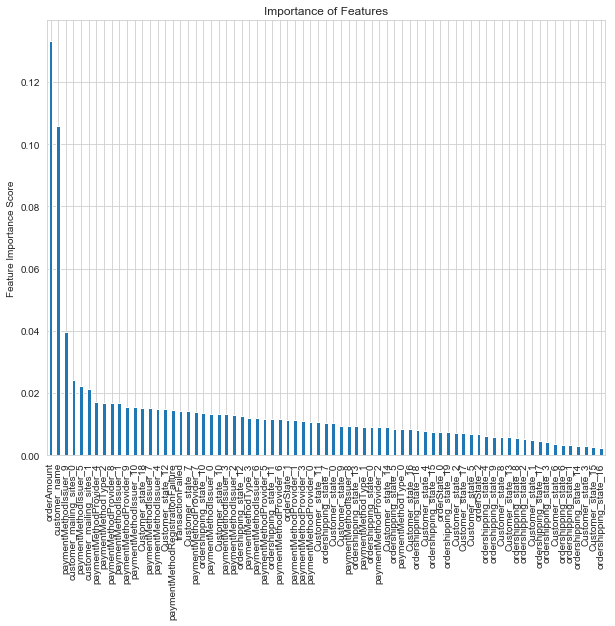

In [85]:
random=RandomForestClassifier(n_estimators=100,max_depth=None,max_features=2)
random.fit(X_train,y_train)
predictors=list(X_train)
feat_imp = pd.Series(random.feature_importances_, predictors).sort_values(ascending=False)
plt.figure(figsize=(10,8))
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the rf on train set: {:.3f}'.format(random.score(X_train, y_train)))
print('Accuracy of the rf on test set: {:.3f}'.format(random.score(X_test, y_test)))
pred=random.predict(X_test)
print(classification_report(y_test, pred))

In [86]:
model=SelectFromModel(RandomForestClassifier(n_estimators = 100,max_depth=None,max_features=3))
model.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=None)

In [87]:
model.get_support()

array([ True, False,  True,  True, False,  True, False, False, False,
        True, False, False, False,  True, False, False, False, False,
       False,  True, False, False,  True,  True, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False,  True, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True])

In [88]:
selected_feat= X_train.columns[(model.get_support())]
len(selected_feat)

16

In [89]:
print(selected_feat)

Index(['paymentMethodRegistrationFailure', 'orderAmount', 'customer_name',
       'paymentMethodIssuer_1', 'paymentMethodIssuer_5',
       'paymentMethodIssuer_9', 'paymentMethodProvider_4',
       'paymentMethodProvider_7', 'paymentMethodProvider_8',
       'paymentMethodType_2', 'Customer_state_7', 'Customer_state_10',
       'Customer_state_12', 'Customer_state_18', 'customer_mailing_sites_0',
       'customer_mailing_sites_1'],
      dtype='object')


In [92]:
columns=['paymentMethodRegistrationFailure', 'orderAmount', 'customer_name',
       'paymentMethodIssuer_1', 'paymentMethodIssuer_5',
       'paymentMethodIssuer_9', 'paymentMethodProvider_4',
       'paymentMethodProvider_7', 'paymentMethodProvider_8',
       'paymentMethodType_2', 'Customer_state_7', 'Customer_state_10',
       'Customer_state_12', 'Customer_state_18', 'customer_mailing_sites_0',
       'customer_mailing_sites_1']
x_test=X_test[columns]

Accuracy of the random on train set: 1.000
Accuracy of the random on test set: 0.904
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        74
           1       0.88      0.88      0.88        51

   micro avg       0.90      0.90      0.90       125
   macro avg       0.90      0.90      0.90       125
weighted avg       0.90      0.90      0.90       125



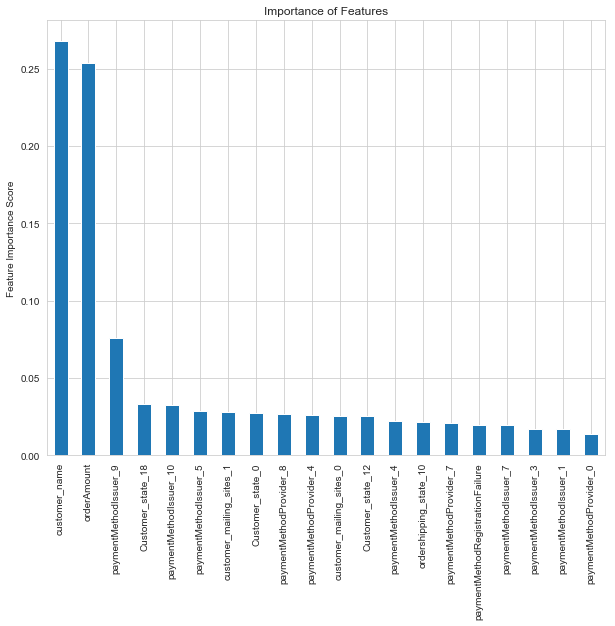

In [107]:
random=RandomForestClassifier(n_estimators=100,max_depth=None,max_features=2)
random.fit(x_train,y_train)
predictors=list(x_train)
feat_imp = pd.Series(random.feature_importances_, predictors).sort_values(ascending=False)
plt.figure(figsize=(10,8))
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the random on train set: {:.3f}'.format(random.score(x_train, y_train)))
print('Accuracy of the random on test set: {:.3f}'.format(random.score(x_test, y_test)))
pred=random.predict(x_test)
print(classification_report(y_test, pred))

In [94]:
pd.crosstab(y_test,pred, rownames=['Real data'], colnames=['Predicted'])

Predicted,0,1
Real data,,
0,74,0
1,7,44


In [95]:
#Bulding a pipeline - Gradient Boosting model
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier(n_estimators=100)

pipeline = Pipeline([
    ('clf', classifier),
])

In [96]:

parameter_grid = {
    'clf__max_features': [0.5, 1,2,3],
    'clf__max_depth': [1,2,3,4,5,None],
}

In [97]:
grid_search = GridSearchCV(pipeline, parameter_grid, cv=5, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] clf__max_depth=1, clf__max_features=0.5 .........................
[CV]  clf__max_depth=1, clf__max_features=0.5, score=0.79, total=   0.0s
[CV] clf__max_depth=1, clf__max_features=0.5 .........................
[CV]  clf__max_depth=1, clf__max_features=0.5, score=0.76, total=   0.0s
[CV] clf__max_depth=1, clf__max_features=0.5 .........................
[CV]  clf__max_depth=1, clf__max_features=0.5, score=0.7575757575757576, total=   0.0s
[CV] clf__max_depth=1, clf__max_features=0.5 .........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  clf__max_depth=1, clf__max_features=0.5, score=0.8383838383838383, total=   0.0s
[CV] clf__max_depth=1, clf__max_features=0.5 .........................
[CV]  clf__max_depth=1, clf__max_features=0.5, score=0.8383838383838383, total=   0.0s
[CV] clf__max_depth=1, clf__max_features=1 ...........................
[CV]  clf__max_depth=1, clf__max_features=1, score=0.61, total=   0.0s
[CV] clf__max_depth=1, clf__max_features=1 ...........................
[CV]  clf__max_depth=1, clf__max_features=1, score=0.64, total=   0.0s
[CV] clf__max_depth=1, clf__max_features=1 ...........................
[CV]  clf__max_depth=1, clf__max_features=1, score=0.6666666666666666, total=   0.0s
[CV] clf__max_depth=1, clf__max_features=1 ...........................
[CV]  clf__max_depth=1, clf__max_features=1, score=0.6464646464646465, total=   0.0s
[CV] clf__max_depth=1, clf__max_features=1 ...........................
[CV]  clf__max_depth=1, clf__max_features=1, score=0.6868686868686869, total=   0.0s
[CV

[CV]  clf__max_depth=3, clf__max_features=3, score=0.8787878787878788, total=   0.0s
[CV] clf__max_depth=4, clf__max_features=0.5 .........................
[CV]  clf__max_depth=4, clf__max_features=0.5, score=0.96, total=   0.1s
[CV] clf__max_depth=4, clf__max_features=0.5 .........................
[CV]  clf__max_depth=4, clf__max_features=0.5, score=0.9, total=   0.1s
[CV] clf__max_depth=4, clf__max_features=0.5 .........................
[CV]  clf__max_depth=4, clf__max_features=0.5, score=0.9191919191919192, total=   0.1s
[CV] clf__max_depth=4, clf__max_features=0.5 .........................
[CV]  clf__max_depth=4, clf__max_features=0.5, score=0.9595959595959596, total=   0.1s
[CV] clf__max_depth=4, clf__max_features=0.5 .........................
[CV]  clf__max_depth=4, clf__max_features=0.5, score=0.9090909090909091, total=   0.1s
[CV] clf__max_depth=4, clf__max_features=1 ...........................
[CV] . clf__max_depth=4, clf__max_features=1, score=0.9, total=   0.0s
[CV] clf__ma

[CV]  clf__max_depth=None, clf__max_features=2, score=0.9191919191919192, total=   0.6s
[CV] clf__max_depth=None, clf__max_features=3 ........................
[CV]  clf__max_depth=None, clf__max_features=3, score=0.94, total=   0.7s
[CV] clf__max_depth=None, clf__max_features=3 ........................
[CV]  clf__max_depth=None, clf__max_features=3, score=0.91, total=   0.6s
[CV] clf__max_depth=None, clf__max_features=3 ........................
[CV]  clf__max_depth=None, clf__max_features=3, score=0.9393939393939394, total=   0.6s
[CV] clf__max_depth=None, clf__max_features=3 ........................
[CV]  clf__max_depth=None, clf__max_features=3, score=0.9595959595959596, total=   0.7s
[CV] clf__max_depth=None, clf__max_features=3 ........................
[CV]  clf__max_depth=None, clf__max_features=3, score=0.9393939393939394, total=   0.7s


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   26.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('clf', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_...    subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'clf__max_features': [0.5, 1, 2, 3], 'clf__max_depth': [1, 2, 3, 4, 5, None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [98]:
sorted(grid_search.cv_results_.keys())
grid_search.best_score_
grid_search.best_params_

{'clf__max_depth': 5, 'clf__max_features': 0.5}

Accuracy of the GBM on train set: 1.000
Accuracy of the GBM on test set: 0.952
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        74
           1       0.98      0.90      0.94        51

   micro avg       0.95      0.95      0.95       125
   macro avg       0.96      0.94      0.95       125
weighted avg       0.95      0.95      0.95       125



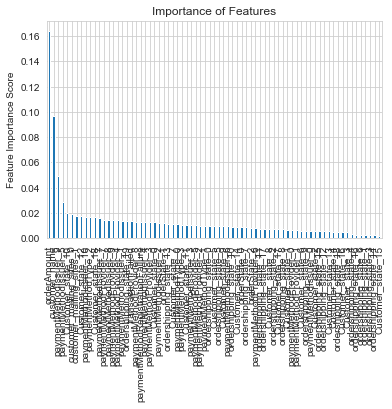

In [99]:
baseline = GradientBoostingClassifier(n_estimators=50,max_features=3,max_depth=None)
baseline.fit(X_train,y_train)
predictors=list(X_train)
feat_imp = pd.Series(baseline.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on train set: {:.3f}'.format(baseline.score(X_train, y_train)))
print('Accuracy of the GBM on test set: {:.3f}'.format(baseline.score(X_test, y_test)))
pred=baseline.predict(X_test)
print(classification_report(y_test, pred))

In [100]:
model=SelectFromModel(GradientBoostingClassifier(n_estimators = 100,max_depth=None,max_features=2))
model.fit(X_train, y_train)

SelectFromModel(estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=None,
              max_features=2, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=None)

In [101]:
model.get_support()

array([ True, False,  True,  True, False,  True, False,  True,  True,
        True, False,  True, False,  True,  True,  True, False, False,
       False,  True, False, False,  True,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
        True])

In [102]:
selected_feat= X_train.columns[(model.get_support())]
len(selected_feat)

20

In [103]:
print(selected_feat)

Index(['paymentMethodRegistrationFailure', 'orderAmount', 'customer_name',
       'paymentMethodIssuer_1', 'paymentMethodIssuer_3',
       'paymentMethodIssuer_4', 'paymentMethodIssuer_5',
       'paymentMethodIssuer_7', 'paymentMethodIssuer_9',
       'paymentMethodIssuer_10', 'paymentMethodProvider_0',
       'paymentMethodProvider_4', 'paymentMethodProvider_7',
       'paymentMethodProvider_8', 'Customer_state_0', 'Customer_state_12',
       'Customer_state_18', 'ordershipping_state_10',
       'customer_mailing_sites_0', 'customer_mailing_sites_1'],
      dtype='object')


In [104]:
columns=['paymentMethodRegistrationFailure', 'orderAmount', 'customer_name',
       'paymentMethodIssuer_1', 'paymentMethodIssuer_3',
       'paymentMethodIssuer_4', 'paymentMethodIssuer_5',
       'paymentMethodIssuer_7', 'paymentMethodIssuer_9',
       'paymentMethodIssuer_10', 'paymentMethodProvider_0',
       'paymentMethodProvider_4', 'paymentMethodProvider_7',
       'paymentMethodProvider_8', 'Customer_state_0', 'Customer_state_12',
       'Customer_state_18', 'ordershipping_state_10',
       'customer_mailing_sites_0', 'customer_mailing_sites_1']
x_train=X_train[columns]
x_test=X_test[columns]

Accuracy of the GBM on train set: 1.000
Accuracy of the GBM on test set: 0.920
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        74
           1       0.94      0.86      0.90        51

   micro avg       0.92      0.92      0.92       125
   macro avg       0.92      0.91      0.92       125
weighted avg       0.92      0.92      0.92       125



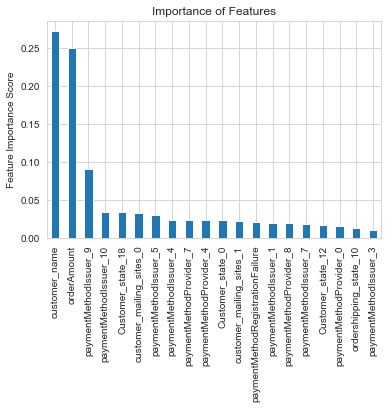

In [105]:
baseline = GradientBoostingClassifier(n_estimators=100,max_features=2,max_depth=None)
baseline.fit(x_train,y_train)
predictors=list(x_train)
feat_imp = pd.Series(baseline.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on train set: {:.3f}'.format(baseline.score(x_train, y_train)))
print('Accuracy of the GBM on test set: {:.3f}'.format(baseline.score(x_test, y_test)))
pred=baseline.predict(x_test)
print(classification_report(y_test, pred))

In [106]:
pd.crosstab(y_test,pred, rownames=['Real data'], colnames=['Predicted'])

Predicted,0,1
Real data,,
0,71,3
1,7,44
